In [2]:
# Vizuelna podešavanja okruženja (samo razvuče notebook na širinu ekrana)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


C:\Users\ira\AppData\Local\Temp\ipykernel_23704\1744846264.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### Importi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

## Ciscenje podataka

In [4]:
def proveri_podatke(df):
    # Provera nedostajućih vrednosti
    missing_values = df.isnull().sum()
    
    # Provera tipova podataka
    data_types = df.dtypes
    
    # Provera duplikata
    duplicates = df.duplicated().sum()
    
    # Prikaz informacija o dataframe-u
    #df_info = df.info()
    
    # Prikaz rezultata provera
    print("Nedostajuće vrednosti po kolonama:")
    print(missing_values)
    print("\nTipovi podataka po kolonama:")
    print(data_types)
    print("\nBroj duplikata:")
    print(duplicates)
    print("\nInformacije o dataframe-u:")
    # print(df.info)


In [5]:
def ciscenje_podataka(df):
    # Brisanje redova gde su polja 'Author', 'Title', 'Document Type', 'Source title', ili 'Year' prazna ili NaN
    df = df.dropna(subset=['Author', 'Title', 'Document Type', 'Source title', 'Year'])
    
    # Provera nedostajućih vrednosti i njihova zamena
    df['Year'] = df['Year'].fillna(0).astype(int)
    df['Volume'] = df['Volume'].fillna('NaN')
    df['Issue'] = df['Issue'].fillna('NaN')
    
    # Čišćenje kolona 'Page start', 'Page end', 'Page count' i 'Cited by' i zamena ne-brojčanih vrednosti sa NaN
    df['Page start'] = pd.to_numeric(df['Page start'], errors='coerce').fillna(0).astype(int)
    df['Page end'] = pd.to_numeric(df['Page end'], errors='coerce').fillna(0).astype(int)
    df['Page count'] = pd.to_numeric(df['Page count'], errors='coerce').fillna(0).astype(int)
    df['Cited by'] = pd.to_numeric(df['Cited by'], errors='coerce').fillna(0).astype(int)
    
    # Uklanjanje beleški, praznih prostora i nepotrebnih karaktera
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    
    # Provera i uklanjanje duplikata
    df = df.drop_duplicates()

    # Filtriranje podataka prema tipu dokumenta
    valid_types = ['Article', 'Article in Press', 'Review', 'Book Chapter', 'Letter', 'Note']
    df = df[df['Document Type'].isin(valid_types)]
    
    # Konsolidacija kolona, ako je potrebno (primer)
    # df['Combined Authors'] = df['Author'] + '; ' + df['Authors']
    
    return df

In [6]:
def cista_latinica(df):
    replacement_rules = {
        'ć': 'c',
        'Ć': 'C',
        'č': 'c',
        'Č': 'C',
        'ž': 'z',
        'Ž': 'Z',
        'Đ': 'Dj',
        'đ': 'dj',
        'š': 's',
        'Š': 'S'
    }

    df.replace(replacement_rules, regex=True, inplace=True)

    return df

### Priprema autora

In [7]:
# Učitavanje datoteke
autori_df = pd.read_csv('data/autoriCSV.csv')

# Spajanje Imena i Prezimena autora u jednu kolonu -> Author
autori_df['Author'] = autori_df['Ime'] + ' ' + autori_df['Prezime']

# Spajanje Prezimena i prvog slova imena u jednu kolonu -> Short Name
autori_df['Short Name'] = autori_df['Prezime'] + ' ' + autori_df['Ime'].str[0] + '.'

# Zamena vrednosti '?' sa 0 u kolonama 'H indeks' i 'Broj radova'
autori_df['H indeks'] = autori_df['H indeks'].replace('?', 0).fillna(0).astype(int)
autori_df['Broj radova'] = autori_df['Broj radova'].replace('?', 0).fillna(0).astype(int)

proveri_podatke(autori_df)

file_path_cleaned = "data/cleaned/autori-csv.csv"
autori_df.to_csv(file_path_cleaned, index=False)


Nedostajuće vrednosti po kolonama:
Ime            0
Prezime        0
Katedra        0
H indeks       0
Broj radova    0
Author         0
Short Name     0
dtype: int64

Tipovi podataka po kolonama:
Ime            object
Prezime        object
Katedra        object
H indeks        int32
Broj radova     int32
Author         object
Short Name     object
dtype: object

Broj duplikata:
0

Informacije o dataframe-u:


### Priprema podataka sa katedri

In [8]:
def ucitajOcistiProveriZapamti(fileName):
    fixedPrefix = "data/"
    df = pd.read_csv(fixedPrefix+fileName)
    df = ciscenje_podataka(df)
    df = cista_latinica(df)

    proveri_podatke(df)

    file_path_cleaned = "data/cleaned/"
    df.to_csv(file_path_cleaned+fileName, index=False)

    return df

In [9]:
epidemiologija = "epidemiologija-csv.csv"
imunologija = "imunologija-csv.csv"
infektivne_bolesti = "infektivne_bolesti-csv.csv"
mikrobiologija = "mikrobiologija-csv.csv"

epidemiologija_df = ucitajOcistiProveriZapamti(epidemiologija)
imunologija_df = ucitajOcistiProveriZapamti(imunologija)
infektivne_bolesti_df = ucitajOcistiProveriZapamti(infektivne_bolesti)
mikrobiologija_df = ucitajOcistiProveriZapamti(mikrobiologija)

C:\Users\ira\AppData\Local\Temp\ipykernel_23704\1591847004.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\ira\AppData\Local\Temp\ipykernel_23704\1591847004.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].fillna(0).astype(int)
C:\Users\ira\AppData\Local\Temp\ipykernel_23704\1591847004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Volume']

Nedostajuće vrednosti po kolonama:
Author             0
Authors            0
Title              0
Year               0
Source title       0
Volume             0
Issue              0
Art. No.         607
Page start         0
Page end           0
Page count         0
Cited by           0
Link               0
Document Type      0
Source             0
dtype: int64

Tipovi podataka po kolonama:
Author           object
Authors          object
Title            object
Year              int64
Source title     object
Volume           object
Issue            object
Art. No.         object
Page start        int64
Page end          int64
Page count        int64
Cited by          int64
Link             object
Document Type    object
Source           object
dtype: object

Broj duplikata:
0

Informacije o dataframe-u:
Nedostajuće vrednosti po kolonama:
Author             0
Authors            0
Title              0
Year               0
Source title       0
Volume             0
Issue              0
Art.

C:\Users\ira\AppData\Local\Temp\ipykernel_23704\1591847004.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].fillna(0).astype(int)
C:\Users\ira\AppData\Local\Temp\ipykernel_23704\1591847004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Volume'].fillna('NaN')
C:\Users\ira\AppData\Local\Temp\ipykernel_23704\1591847004.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

### Statisticka obrada podataka

#### Broj radova po autoru (celovito i frakciono brojanje):
- Celovito brojanje: Broj radova gde se autor pojavljuje kao koautor.
- Frakciono brojanje: Svakom koautoru dodeljujemo frakciono učešće (1/n, gde je n broj koautora na radu).

In [11]:
combined_data = pd.concat([epidemiologija_df, imunologija_df, infektivne_bolesti_df, mikrobiologija_df])

# Celovito brojanje radova po autoru
celovito_brojanje = combined_data['Author'].value_counts().reset_index()
celovito_brojanje.columns = ['Author', 'Full Count']

# Frakciono brojanje radova po autoru
combined_data['Fractional Count'] = combined_data['Authors'].apply(lambda x: 1 / len(x.split(',')))
frakciono_brojanje = combined_data.groupby('Author')['Fractional Count'].sum().reset_index()

# Spajanje rezultata brojanja
rezultati = pd.merge(celovito_brojanje, frakciono_brojanje, on='Author')

# Dodavanje katedre za svakog autora
rezultati = pd.merge(rezultati, autori_df[['Author', 'Katedra']], on='Author', how='left')

# Identifikacija najproduktivnijih naučnika
najproduktivniji = rezultati.sort_values(by='Full Count', ascending=False).head(10)

print("\nNajproduktivniji naučnici:")
print(najproduktivniji)

# Celovito brojanje radova po autoru
# author_paper_counts = epidemiologija_df['Author'].value_counts()

# # Frakciono brojanje radova po autoru
# epidemiologija_df['Authors Count'] = epidemiologija_df['Authors'].apply(lambda x: len(x.split(',')))
# epidemiologija_df['Fractional Count'] = 1 / epidemiologija_df['Authors Count']

# fractional_counts = epidemiologija_df.groupby('Author')['Fractional Count'].sum()

# # Prikazivanje rezultata
# print("Celovito brojanje radova po autoru:")
# print(author_paper_counts)

# print("\nFrakciono brojanje radova po autoru:")
# print(fractional_counts)
najproduktivniji.head(10)



Najproduktivniji naučnici:
                        Author  Full Count  Fractional Count  \
0           Tatjana Pekmezovic         263         44.072876   
1           Vladimir Trajkovic         155         24.211887   
2                 Vera Pravica          88         14.234907   
3      Ljiljana Markovic-Denic          84         17.727477   
4             Tatjana Gazibara          77         13.978644   
5              Maja Stanojevic          70          8.004936   
6      Darija Kisic-Tepavcevic          62          9.873965   
7  Valentina Arsic-Arsenijevic          50          6.976318   
8               Ivana Cirkovic          46          8.246388   
9                Dusan Popadic          46          6.589597   

                     Katedra  
0  Katedra za epidemiologiju  
1     Katedra za imunologiju  
2     Katedra za imunologiju  
3  Katedra za epidemiologiju  
4  Katedra za epidemiologiju  
5  Katedra za mikrobiologiju  
6  Katedra za epidemiologiju  
7  Katedra za mikro

Author  Full Count  Fractional Count  \
0           Tatjana Pekmezovic         263         44.072876   
1           Vladimir Trajkovic         155         24.211887   
2                 Vera Pravica          88         14.234907   
3      Ljiljana Markovic-Denic          84         17.727477   
4             Tatjana Gazibara          77         13.978644   
5              Maja Stanojevic          70          8.004936   
6      Darija Kisic-Tepavcevic          62          9.873965   
7  Valentina Arsic-Arsenijevic          50          6.976318   
8               Ivana Cirkovic          46          8.246388   
9                Dusan Popadic          46          6.589597   

                     Katedra  
0  Katedra za epidemiologiju  
1     Katedra za imunologiju  
2     Katedra za imunologiju  
3  Katedra za epidemiologiju  
4  Katedra za epidemiologiju  
5  Katedra za mikrobiologiju  
6  Katedra za epidemiologiju  
7  Katedra za mikrobiologiju  
8  Katedra za mikrobiologiju  
9     Katedra za imunologiju

#### Prosečan broj koautora po svakom autoru:

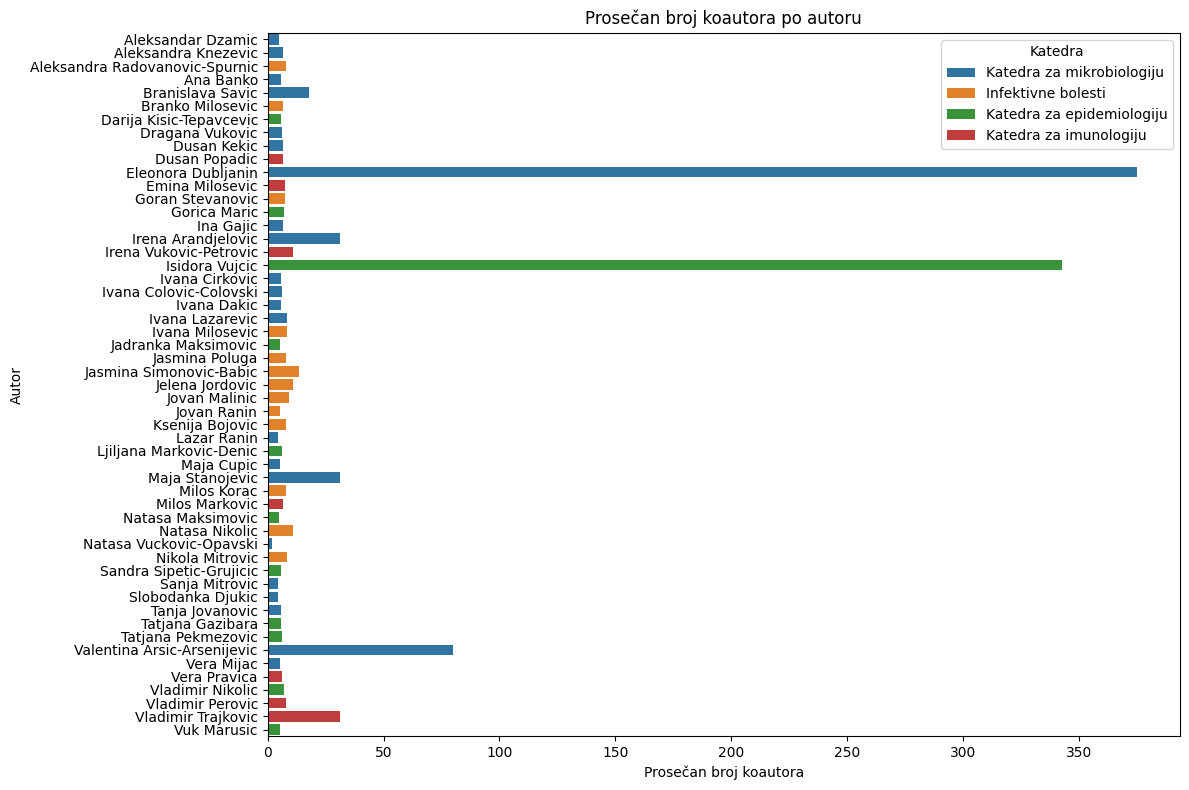

Author  Average Coauthors                    Katedra
10           Eleonora Dubljanin         374.783784  Katedra za mikrobiologiju
17               Isidora Vujcic         342.814815  Katedra za epidemiologiju
46  Valentina Arsic-Arsenijevic          80.140000  Katedra za mikrobiologiju
33              Maja Stanojevic          31.342857  Katedra za mikrobiologiju
51           Vladimir Trajkovic          31.161290     Katedra za imunologiju
15           Irena Arandjelovic          31.000000  Katedra za mikrobiologiju
4              Branislava Savic          17.740741  Katedra za mikrobiologiju
25      Jasmina Simonovic-Babic          13.470588         Infektivne bolesti
26              Jelena Jordovic          11.142857         Infektivne bolesti
16       Irena Vukovic-Petrovic          11.000000     Katedra za imunologiju

In [14]:
def count_coauthors(authors):
    return len(authors.split(',')) - 1

# Dodavanje kolone sa brojem koautora
combined_data['Coauthor Count'] = combined_data['Authors'].apply(count_coauthors)

# Računanje prosečnog broja koautora po svakom autoru
prosek_koautora = combined_data.groupby('Author')['Coauthor Count'].mean().reset_index()
prosek_koautora.columns = ['Author', 'Average Coauthors']

# Dodavanje katedre za svakog autora
prosek_koautora = pd.merge(prosek_koautora, autori_df[['Author', 'Katedra']], on='Author', how='left')

# Ispis rezultata
#print("Prosečan broj koautora po svakom autoru:")
#print(prosek_koautora)

plt.figure(figsize=(12, 8))
sns.barplot(data=prosek_koautora, x='Average Coauthors', y='Author', hue='Katedra', dodge=False)
plt.title('Prosečan broj koautora po autoru')
plt.xlabel('Prosečan broj koautora')
plt.ylabel('Autor')
plt.legend(title='Katedra')
plt.tight_layout()
plt.show()

# # Prosečan broj koautora po autoru
# average_coauthors = epidemiologija_df.groupby('Author')['Authors Count'].mean()

# print("\nProsečan broj koautora po autoru:")
prosek_koautora = prosek_koautora.sort_values(by='Average Coauthors', ascending=False)
prosek_koautora.head(10)

#### H - indeks
- H-indeks se izračunava na osnovu broja radova i broja citata svakog rada. Naučnik ima H-indeks H ako ima H radova koji su citirani najmanje H puta svaki.

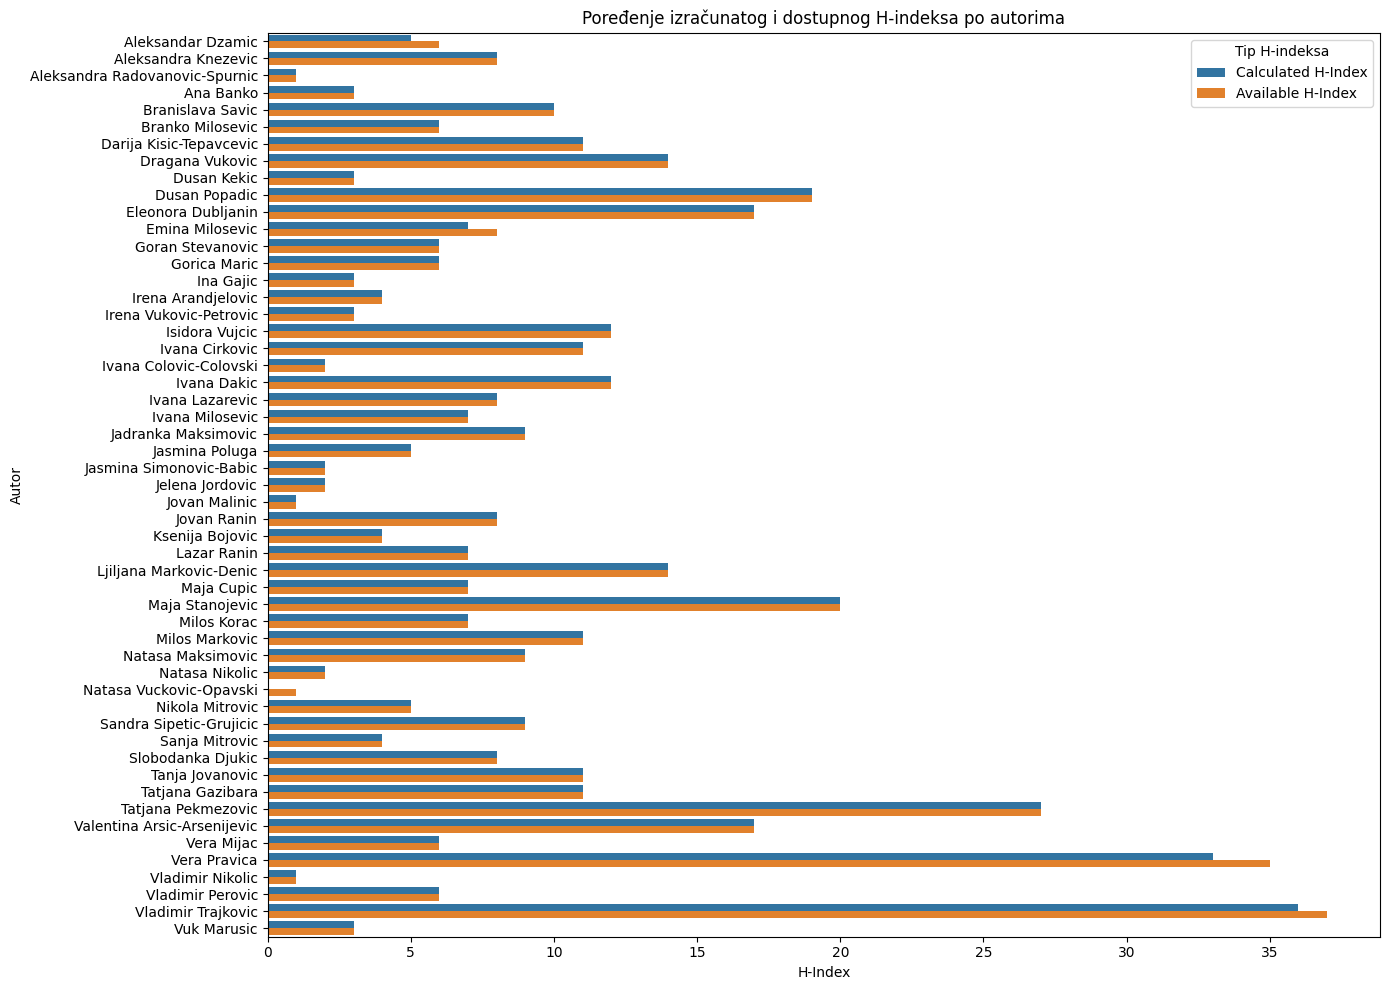

Author  Calculated H-Index  Available H-Index
51           Vladimir Trajkovic                  36                 37
48                 Vera Pravica                  33                 35
45           Tatjana Pekmezovic                  27                 27
33              Maja Stanojevic                  20                 20
9                 Dusan Popadic                  19                 19
46  Valentina Arsic-Arsenijevic                  17                 17
10           Eleonora Dubljanin                  17                 17
31      Ljiljana Markovic-Denic                  14                 14
7               Dragana Vukovic                  14                 14
20                  Ivana Dakic                  12                 12

In [18]:
# Funkcija za izračunavanje H-indeksa
def calculate_h_index(citations):
    citations = sorted(citations, reverse=True)
    h_index = sum(i < c for i, c in enumerate(citations))
    return h_index

# Računanje H-indeksa za svakog autora
h_index_data = combined_data.groupby('Author')['Cited by'].apply(list).reset_index()
h_index_data['Calculated H-Index'] = h_index_data['Cited by'].apply(calculate_h_index)

# Dodavanje dostupnog H-indeksa iz datoteke autori
h_index_comparison = pd.merge(h_index_data, autori_df[['Author', 'H indeks']], on='Author', how='left')
h_index_comparison.rename(columns={'H indeks': 'Available H-Index'}, inplace=True)

# Ispis rezultata
# print("Uporedni prikaz H-indeksa:")
# print(h_index_comparison.head(5))

# Kreiranje podataka za vizualizaciju
h_index_comparison_melted = h_index_comparison.melt(id_vars='Author', value_vars=['Calculated H-Index', 'Available H-Index'], var_name='H-Index Type', value_name='H-Index')

# Plotovanje
plt.figure(figsize=(14, 10))
sns.barplot(data=h_index_comparison_melted, x='H-Index', y='Author', hue='H-Index Type', dodge=True)
plt.title('Poređenje izračunatog i dostupnog H-indeksa po autorima')
plt.xlabel('H-Index')
plt.ylabel('Autor')
plt.legend(title='Tip H-indeksa')
plt.tight_layout()
plt.show()

h_index_comparison = h_index_comparison.sort_values(by='Calculated H-Index', ascending=False)
h_index_comparison[['Author', 'Calculated H-Index', 'Available H-Index']].head(10)

#### Produktivnost katedri

C:\Users\ira\AppData\Local\Temp\ipykernel_23704\3692869080.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=katedre_produktivnost, x='Broj Radova', y='Katedra', palette='viridis')
C:\Users\ira\AppData\Local\Temp\ipykernel_23704\3692869080.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=katedre_produktivnost, x='Ukupan Broj Citata', y='Katedra', palette='magma')


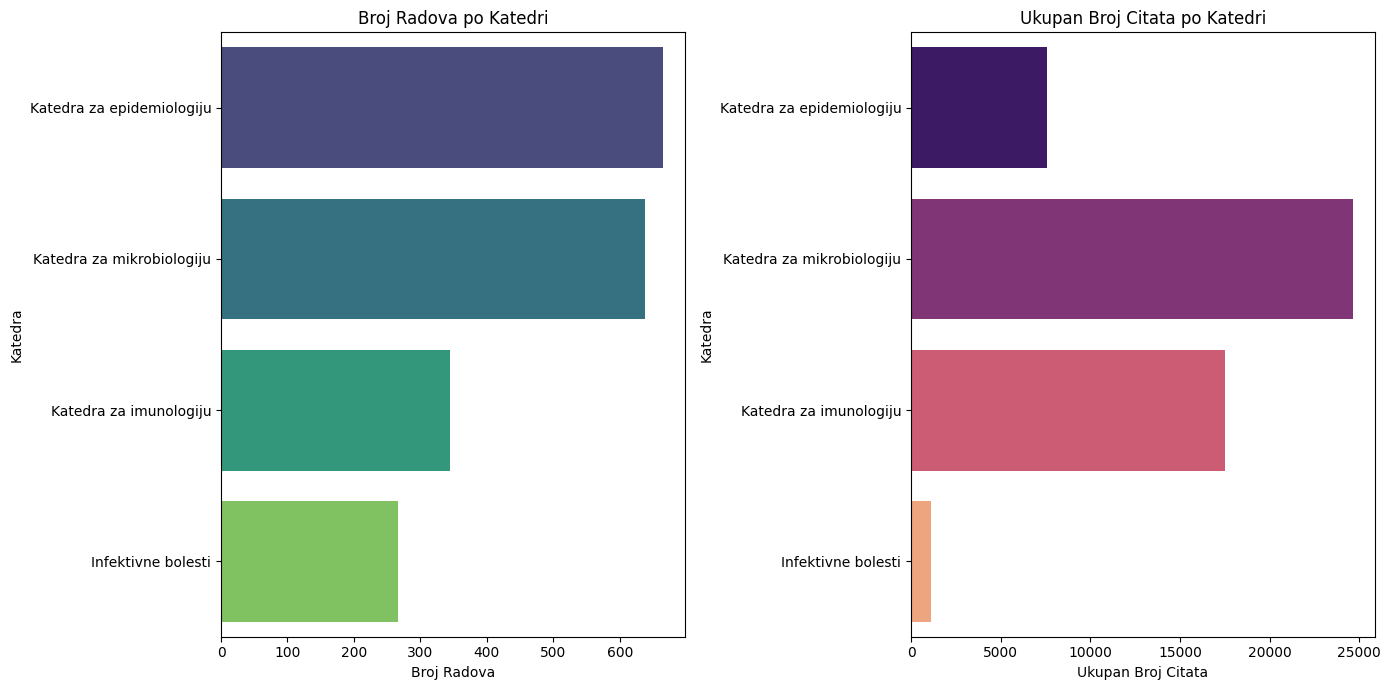

Katedra  Broj Radova  Ukupan Broj Citata
1  Katedra za epidemiologiju          665                7590
3  Katedra za mikrobiologiju          638               24652
2     Katedra za imunologiju          344               17526
0         Infektivne bolesti          266                1108

In [21]:
# Dodavanje katedre za svakog autora
combined_data = pd.merge(combined_data, autori_df[['Author', 'Katedra']], on='Author', how='left')

# Grupisanje po katedrama i izračunavanje broja radova i broja citata
katedre_produktivnost = combined_data.groupby('Katedra').agg({'Title': 'count', 'Cited by': 'sum'}).reset_index()
katedre_produktivnost.columns = ['Katedra', 'Broj Radova', 'Ukupan Broj Citata']

# Sortiranje po broju radova i citata
katedre_produktivnost = katedre_produktivnost.sort_values(by=['Broj Radova', 'Ukupan Broj Citata'], ascending=False)

# print(katedre_produktivnost)

plt.figure(figsize=(14, 7))

# Broj radova po katedri
plt.subplot(1, 2, 1)
sns.barplot(data=katedre_produktivnost, x='Broj Radova', y='Katedra', palette='viridis')
plt.title('Broj Radova po Katedri')
plt.xlabel('Broj Radova')
plt.ylabel('Katedra')

# Ukupan broj citata po katedri
plt.subplot(1, 2, 2)
sns.barplot(data=katedre_produktivnost, x='Ukupan Broj Citata', y='Katedra', palette='magma')
plt.title('Ukupan Broj Citata po Katedri')
plt.xlabel('Ukupan Broj Citata')
plt.ylabel('Katedra')

plt.tight_layout()
plt.show()

katedre_produktivnost.head()


#### Broj radova po godinama

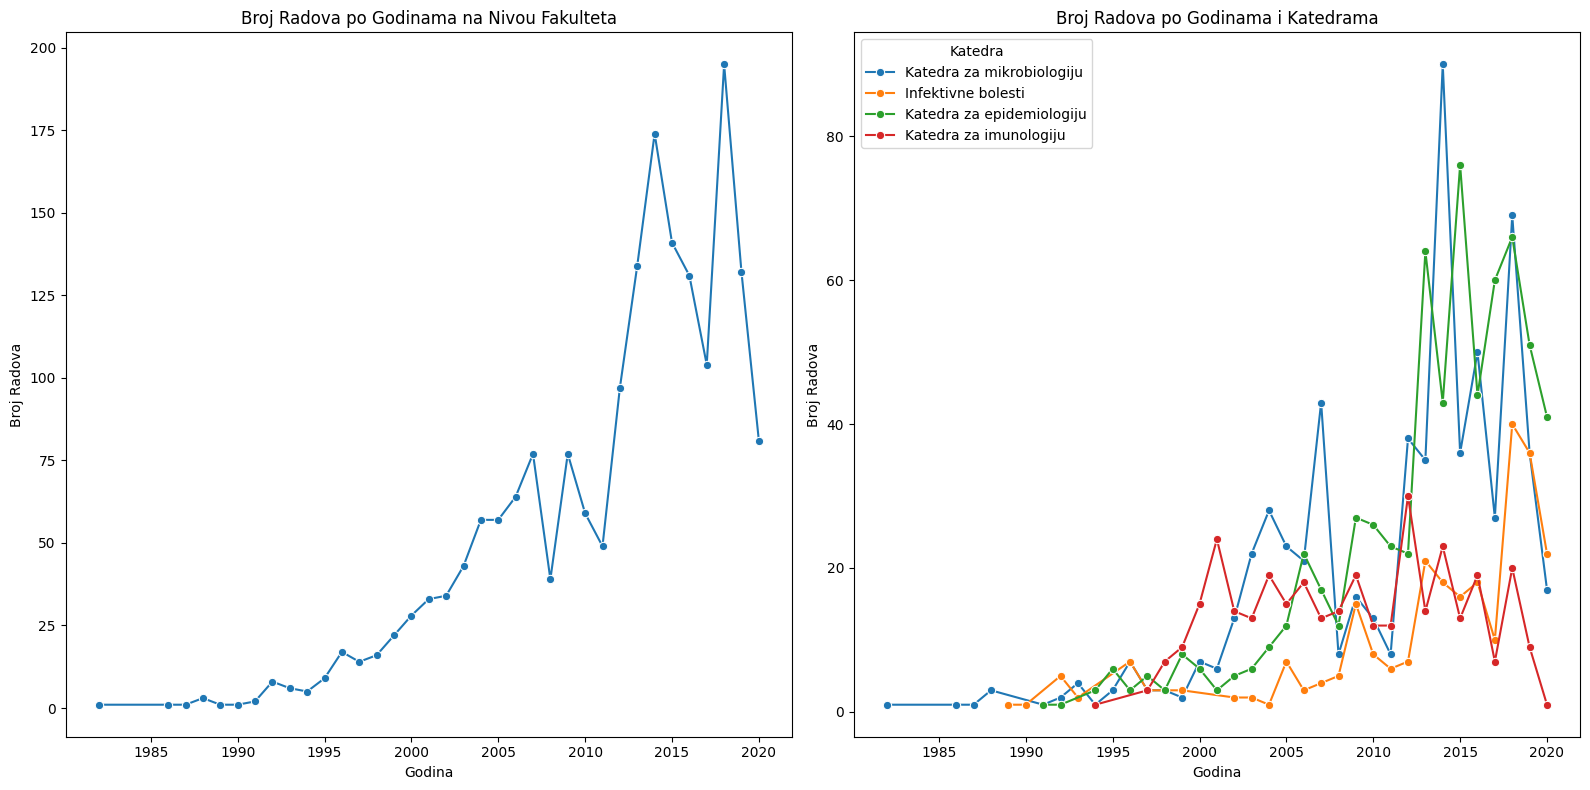

Godina                    Katedra  Broj Radova
112    2020  Katedra za epidemiologiju           41
111    2020         Infektivne bolesti           22
114    2020  Katedra za mikrobiologiju           17
113    2020     Katedra za imunologiju            1
108    2019  Katedra za epidemiologiju           51
107    2019         Infektivne bolesti           36
110    2019  Katedra za mikrobiologiju           36
109    2019     Katedra za imunologiju            9
106    2018  Katedra za mikrobiologiju           69
104    2018  Katedra za epidemiologiju           66
103    2018         Infektivne bolesti           40
105    2018     Katedra za imunologiju           20

In [30]:
# Grupisanje po godinama i katedrama i izračunavanje broja radova
produktivnost_po_godinama = combined_data.groupby(['Year', 'Katedra']).agg({'Title': 'count'}).reset_index()
produktivnost_po_godinama.columns = ['Godina', 'Katedra', 'Broj Radova']

#print(produktivnost_po_godinama)

# Grupisanje po godinama na nivou fakulteta
produktivnost_fakultet = combined_data.groupby('Year').agg({'Title': 'count'}).reset_index()
produktivnost_fakultet.columns = ['Godina', 'Broj Radova']

#print(produktivnost_fakultet)

plt.figure(figsize=(16, 8))

# Broj radova po godinama na nivou fakulteta
plt.subplot(1, 2, 1)
sns.lineplot(data=produktivnost_fakultet, x='Godina', y='Broj Radova', marker='o')
plt.title('Broj Radova po Godinama na Nivou Fakulteta')
plt.xlabel('Godina')
plt.ylabel('Broj Radova')

# Broj radova po godinama i katedrama
plt.subplot(1, 2, 2)
sns.lineplot(data=produktivnost_po_godinama, x='Godina', y='Broj Radova', hue='Katedra', marker='o')
plt.title('Broj Radova po Godinama i Katedrama')
plt.xlabel('Godina')
plt.ylabel('Broj Radova')
plt.legend(title='Katedra')

plt.tight_layout()
plt.show()

produktivnost_fakultet.sort_values(by='Broj Radova', ascending=False).head(10)
produktivnost_po_godinama.sort_values(by=['Godina', 'Broj Radova'], ascending=False).head(12)

#### U kojim casopisima se najvise objavljuje

C:\Users\ira\AppData\Local\Temp\ipykernel_23704\667158251.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_casopisi, x='Broj Radova', y='Source title', palette='coolwarm')


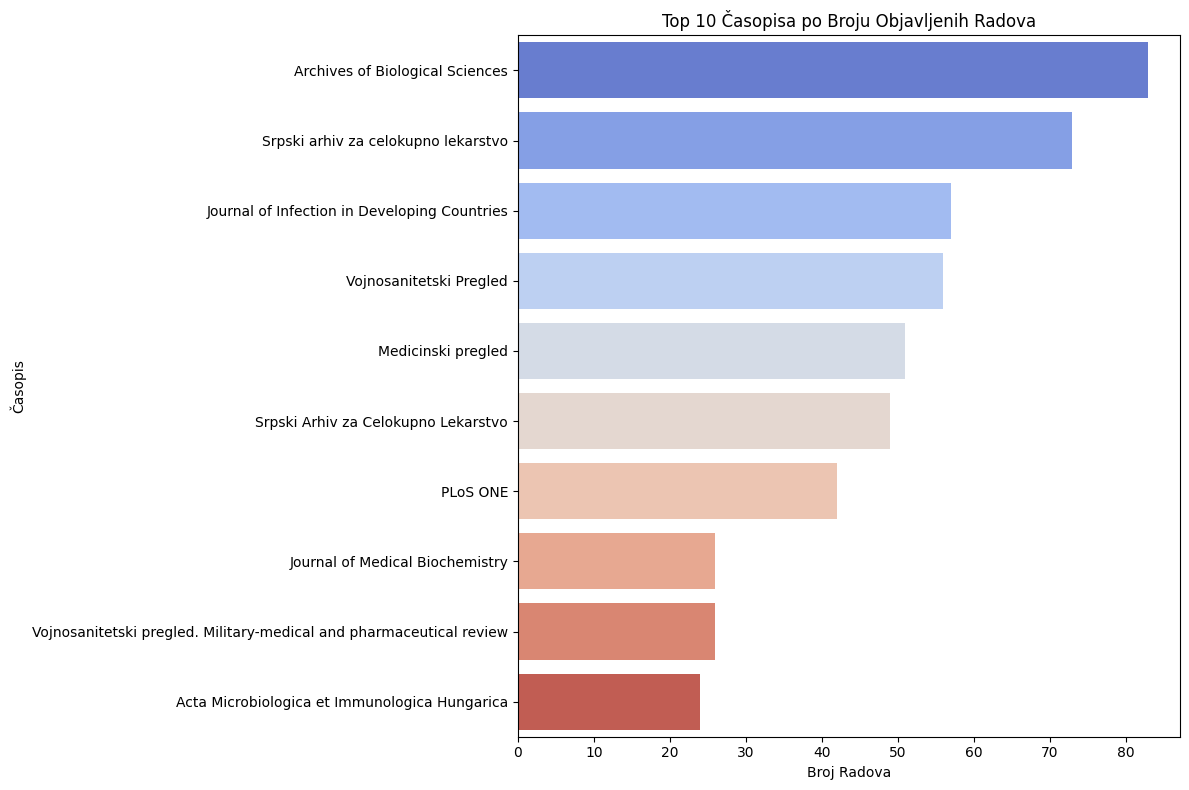

Source title  Broj Radova
0                    Archives of Biological Sciences           83
1                Srpski arhiv za celokupno lekarstvo           73
2       Journal of Infection in Developing Countries           57
3                            Vojnosanitetski Pregled           56
4                                 Medicinski pregled           51
5                Srpski Arhiv za Celokupno Lekarstvo           49
6                                           PLoS ONE           42
7                    Journal of Medical Biochemistry           26
8  Vojnosanitetski pregled. Military-medical and ...           26
9      Acta Microbiologica et Immunologica Hungarica           24

In [31]:
# Grupisanje podataka po časopisima i izračunavanje broja radova
casopisi_produktivnost = combined_data['Source title'].value_counts().reset_index()
casopisi_produktivnost.columns = ['Source title', 'Broj Radova']

# Uzimanje prvih 10 časopisa sa najviše radova
top_casopisi = casopisi_produktivnost.head(10)

# print(top_casopisi)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_casopisi, x='Broj Radova', y='Source title', palette='coolwarm')
plt.title('Top 10 Časopisa po Broju Objavljenih Radova')
plt.xlabel('Broj Radova')
plt.ylabel('Časopis')
plt.tight_layout()
plt.show()

top_casopisi.head(10)

#### Da li postoje razlike između katedri u smislu obima i učestanosti publikovanja u časopisima?
- Reseno u Broj radova po godinama

#### Da li postoji razlika u prosečnom broju autora po radovima u časopisima po katedrama
-Reseno u Prosečan broj koautora po svakom autoru

#### Odnos broja koautora sa fakulteta u odnosu na broj autora van fakulteta 

C:\Users\ira\AppData\Local\Temp\ipykernel_23704\970288368.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette='Set2')


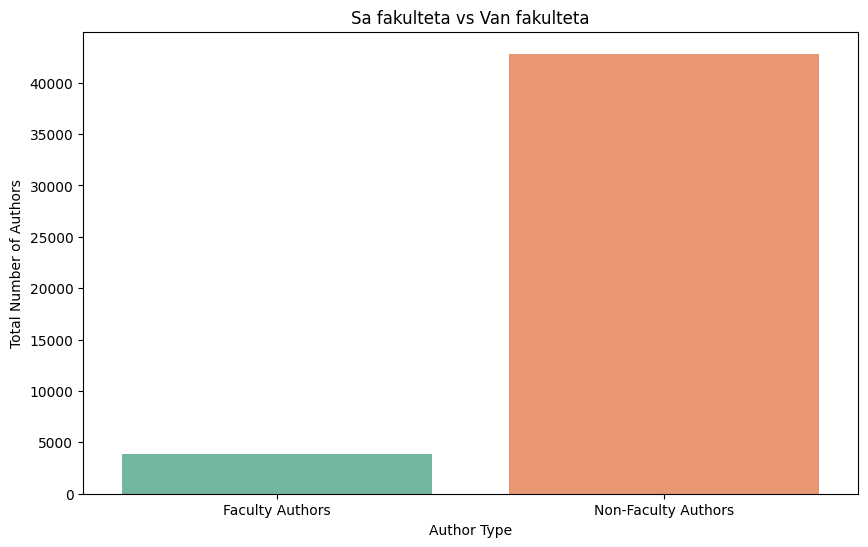

                     Katedra  Faculty Authors  Non-Faculty Authors
0         Infektivne bolesti              749                 1641
1  Katedra za epidemiologiju             1121                12678
2     Katedra za imunologiju              551                 5870
3  Katedra za mikrobiologiju             1408                22630


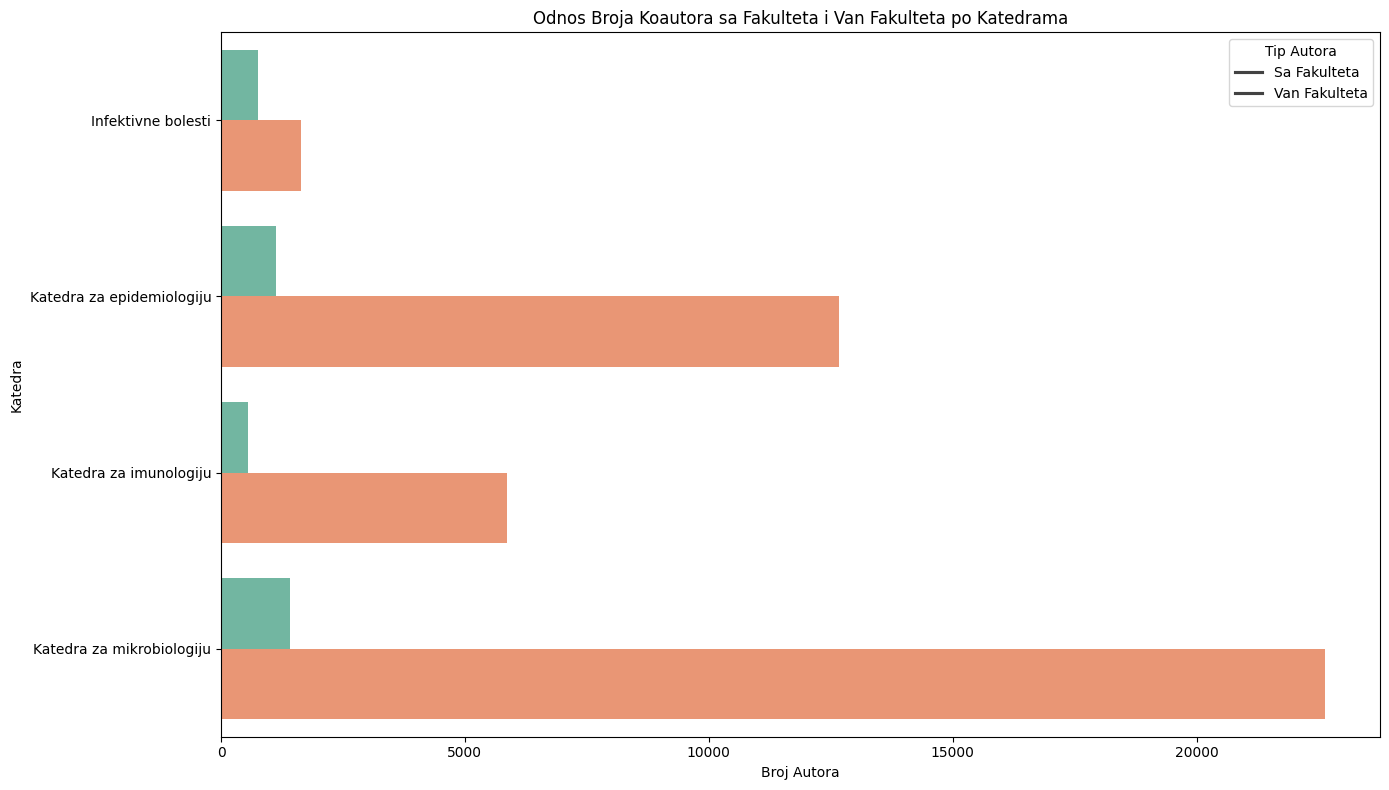

In [33]:
# Funkcija za kategorizaciju autora
def categorize_authors(row, faculty_authors):
    authors = [author.strip() for author in row['Authors'].split(',')]
    faculty_count = sum(1 for author in authors if author in faculty_authors)
    non_faculty_count = len(authors) - faculty_count
    return pd.Series([faculty_count, non_faculty_count])

faculty_authors = set(autori_df['Short Name'])

# Primena funkcije na svaki red DataFrame-a
combined_data[['Faculty Authors', 'Non-Faculty Authors']] = combined_data.apply(categorize_authors, axis=1, faculty_authors=faculty_authors)

# Izračunavanje ukupnog broja koautora sa fakulteta i van fakulteta
total_faculty_authors = combined_data['Faculty Authors'].sum()
total_non_faculty_authors = combined_data['Non-Faculty Authors'].sum()

# Prikazivanje rezultata
# print("Total Faculty Authors:", total_faculty_authors)
# print("Total Non-Faculty Authors:", total_non_faculty_authors)

labels = ['Faculty Authors', 'Non-Faculty Authors']
counts = [total_faculty_authors, total_non_faculty_authors]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts, palette='Set2')
plt.title('Sa fakulteta vs Van fakulteta')
plt.xlabel('Author Type')
plt.ylabel('Total Number of Authors')
plt.show()

# Grupisanje podataka po katedrama i izračunavanje broja autora
faculty_vs_non_faculty_katedre = combined_data.groupby('Katedra').agg({
    'Faculty Authors': 'sum',
    'Non-Faculty Authors': 'sum'
}).reset_index()

print(faculty_vs_non_faculty_katedre)

plt.figure(figsize=(14, 8))
sns.set_palette('Set2')

sns.barplot(data=faculty_vs_non_faculty_katedre.melt(id_vars='Katedra', value_vars=['Faculty Authors', 'Non-Faculty Authors']), x='value', y='Katedra', hue='variable')
plt.title('Odnos Broja Koautora sa Fakulteta i Van Fakulteta po Katedrama')
plt.xlabel('Broj Autora')
plt.ylabel('Katedra')
plt.legend(title='Tip Autora', labels=['Sa Fakulteta', 'Van Fakulteta'])
plt.tight_layout()
plt.show()


### Kreiranje mreze

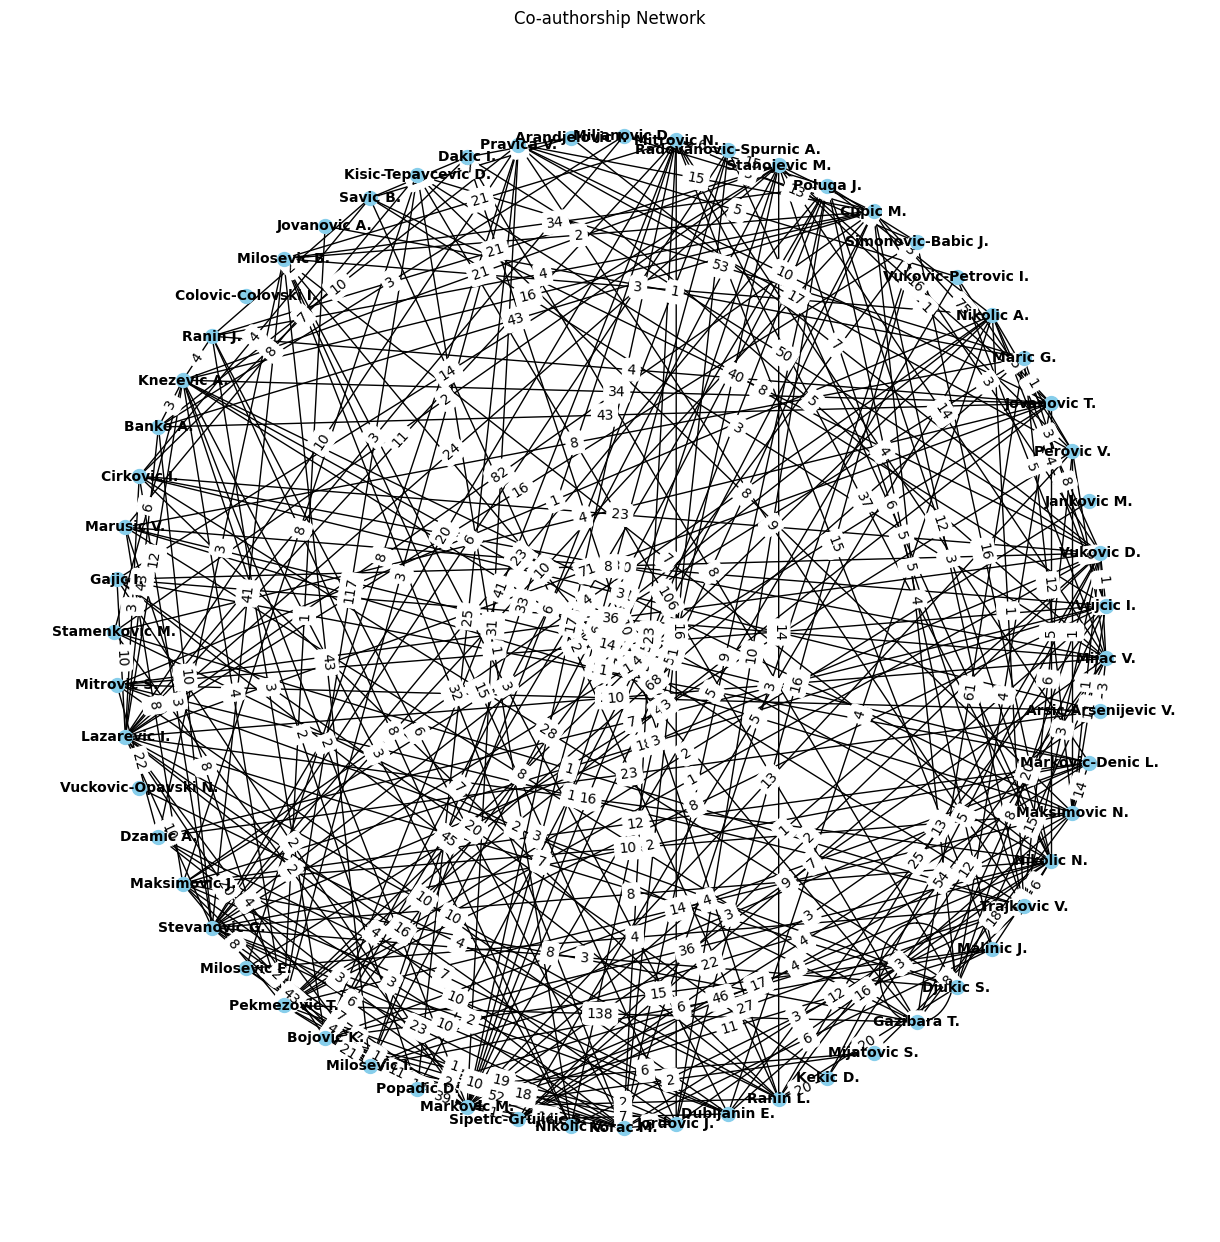

In [34]:
# Kreiranje grafa koautora
G = nx.Graph()

# Dodavanje čvorova (autora)
for author in faculty_authors:
    G.add_node(author)

# Dodavanje grana (koautorstava)
for index, row in combined_data.iterrows():
    authors = [author.strip() for author in row['Authors'].split(',')]
    faculty_coauthors = [author for author in authors if author in faculty_authors]
    for i, author1 in enumerate(faculty_coauthors):
        for author2 in faculty_coauthors[i + 1:]:
            if G.has_edge(author1, author2):
                G[author1][author2]['weight'] += 1
            else:
                G.add_edge(author1, author2, weight=1)

# Vizualizacija mreže
plt.figure(figsize=(12, 12))
pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Co-authorship Network')
plt.show()


#### Statistika

In [35]:
# Broj čvorova
num_nodes = G.number_of_nodes()

# Broj grana
num_edges = G.number_of_edges()

# Prosečan stepen
average_degree = sum(dict(G.degree()).values()) / num_nodes

# Gustina
density = nx.density(G) # Gustina mreže je mera koja pokazuje koliko je mreža povezana, odnosno koliki je odnos stvarnih veza (grana) u mreži u odnosu na maksimalni broj mogućih veza

# Prečnik mreže (računa se samo za povezane komponente)
if nx.is_connected(G):
    diameter = nx.diameter(G)
    average_path_length = nx.average_shortest_path_length(G)
else:
    diameter = "N/A (mreža nije povezana)" # Mreža je povezana kada postoji put između svakog para čvorova
    average_path_length = "N/A (mreža nije povezana)"

# Prikazivanje osnovnih karakteristika mreže
print(f"Broj čvorova: {num_nodes}")
print(f"Broj grana: {num_edges}")
print(f"Gustina mreže: {density:.4f}")
print(f"Prosečan stepen: {average_degree:.2f}")
print(f"Prečnik mreže: {diameter}")
print(f"Prosečna dužina puta: {average_path_length}")


Broj čvorova: 59
Broj grana: 290
Gustina mreže: 0.1695
Prosečan stepen: 9.83
Prečnik mreže: N/A (mreža nije povezana)
Prosečna dužina puta: N/A (mreža nije povezana)


#### Kolike su prosečne distance u okviru mreže i dijametar mreže?
- Pronalaženje najveće povezane komponente mreže.
- Izračunavanje prosečne dužine puta i prečnika za tu komponentu.

In [36]:
# Pronalaženje najveće povezane komponente mreže
largest_cc = max(nx.connected_components(G), key=len)
G_largest_cc = G.subgraph(largest_cc).copy()

# Izračunavanje prosečne dužine puta i prečnika za najveću povezanu komponentu
average_path_length = nx.average_shortest_path_length(G_largest_cc)
diameter = nx.diameter(G_largest_cc)

# Prikazivanje rezultata
print(f"Prosečna dužina puta: {average_path_length}")
print(f"Prečnik mreže: {diameter}")


Prosečna dužina puta: 2.131881427707199
Prečnik mreže: 4


#### U kojoj meri je mreža povezana i centralizovana
- Identifikovati sve povezane komponente.
- Izračunati broj i veličine povezanih komponenata.
- Proveriti postojanje gigantske komponente.

In [37]:
# Pronalaženje svih povezanih komponenti
connected_components = list(nx.connected_components(G))
num_components = len(connected_components)

# Izračunavanje veličina povezanih komponenti
component_sizes = [len(component) for component in connected_components]
max_component_size = max(component_sizes)

# Provera postojanja gigantske komponente (gigantska komponenta sadrži više od 50% čvorova)
num_nodes = G.number_of_nodes()
gigantic_component_threshold = 0.5 * num_nodes
has_gigantic_component = max_component_size > gigantic_component_threshold

# Centralnost mreže
degree_centralization = nx.degree_centrality(G)
betweenness_centralization = nx.betweenness_centrality(G)
closeness_centralization = nx.closeness_centrality(G)

# Prosečne vrednosti centralnosti
avg_degree_centralization = sum(degree_centralization.values()) / num_nodes
avg_betweenness_centralization = sum(betweenness_centralization.values()) / num_nodes
avg_closeness_centralization = sum(closeness_centralization.values()) / num_nodes

# Prikaz rezultata
print(f"Broj povezanih komponenti: {num_components}")
print(f"Veličine povezanih komponenti: {component_sizes}")
print(f"Najveća povezana komponenta: {max_component_size}")
print(f"Postoji li gigantska komponenta: {'Da' if has_gigantic_component else 'Ne'}")
print(f"Prosečni stepen centralnosti: {avg_degree_centralization:.4f}")
print(f"Prosečna betweenness centralnost: {avg_betweenness_centralization:.4f}")
print(f"Prosečna closeness centralnost: {avg_closeness_centralization:.4f}")


Broj povezanih komponenti: 2
Veličine povezanih komponenti: [58, 1]
Najveća povezana komponenta: 58
Postoji li gigantska komponenta: Da
Prosečni stepen centralnosti: 0.1695
Prosečna betweenness centralnost: 0.0192
Prosečna closeness centralnost: 0.4606


#### Prosečni & globalni koeficijent klasterizacije mreže; Raspodela lokalnog koeficijenta klasterizacije čvorova; Klasterisanje izraženo ili ne?
- Izračunavanje prosečnog i globalnog koeficijenta klasterizacije za originalnu mrežu.
- Izračunavanje lokalnog koeficijenta klasterizacije za čvorove u mreži.
- Generisanje slučajne Erdos-Renyi mreže i scale-free mreže iste dimenzije.
- Upoređivanje koeficijenta klasterizacije originalne mreže sa slučajnim mrežama.

Prosečni koeficijent klasterizacije: 0.5444766642696539
Globalni koeficijent klasterizacije: 0.44030075187969925
Lokalni koeficijent klasterizacije - Raspodela: 0.5444766642696538, 0.2605900864559493


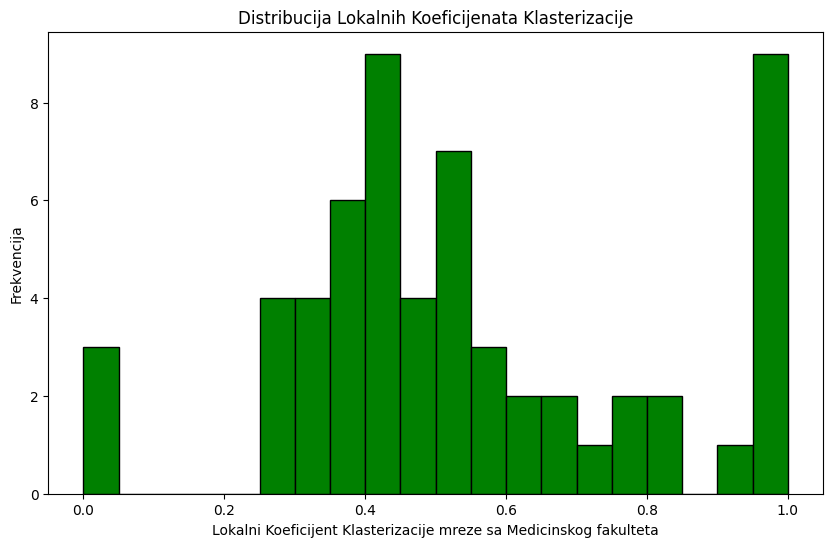

In [57]:
import numpy as np

# Izračunavanje prosečnog i globalnog koeficijenta klasterizacije
average_clustering = nx.average_clustering(G)
global_clustering = nx.transitivity(G)

# Izračunavanje lokalnog koeficijenta klasterizacije
local_clustering = nx.clustering(G)
local_clustering_values = list(local_clustering.values())

print(f"Prosečni koeficijent klasterizacije: {average_clustering}")
print(f"Globalni koeficijent klasterizacije: {global_clustering}")
print(f"Lokalni koeficijent klasterizacije - Raspodela: {np.mean(local_clustering_values)}, {np.std(local_clustering_values)}")

plt.figure(figsize=(10, 6))
plt.hist(local_clustering_values, bins=20, color='green', edgecolor='black')
plt.title('Distribucija Lokalnih Koeficijenata Klasterizacije')
plt.xlabel('Lokalni Koeficijent Klasterizacije mreze sa Medicinskog fakulteta')
plt.ylabel('Frekvencija')
plt.show()


Erdos-Renyi mreža - Prosečni koeficijent klasterizacije: 0.162488829437982
Erdos-Renyi mreža - Globalni koeficijent klasterizacije: 0.1590909090909091
Scale-free mreža - Prosečni koeficijent klasterizacije: 0.13597887888699664
Scale-free mreža - Globalni koeficijent klasterizacije: 0.06656101426307448


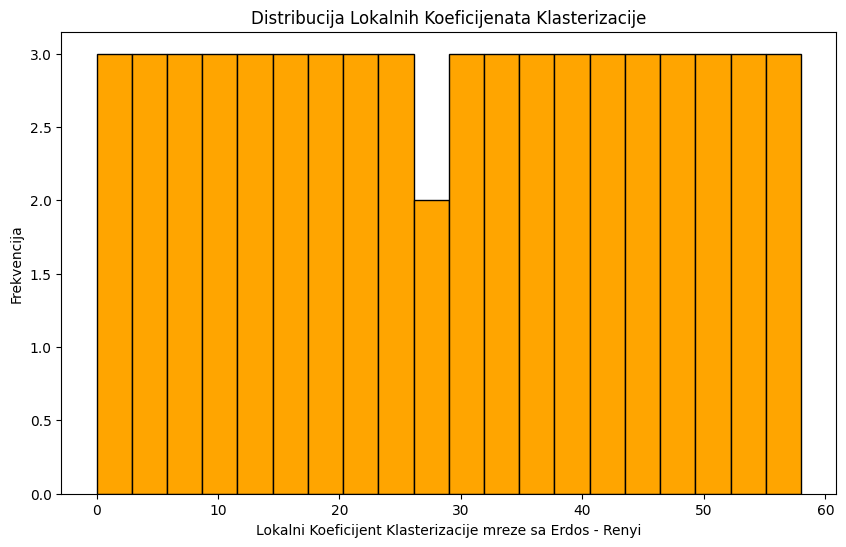

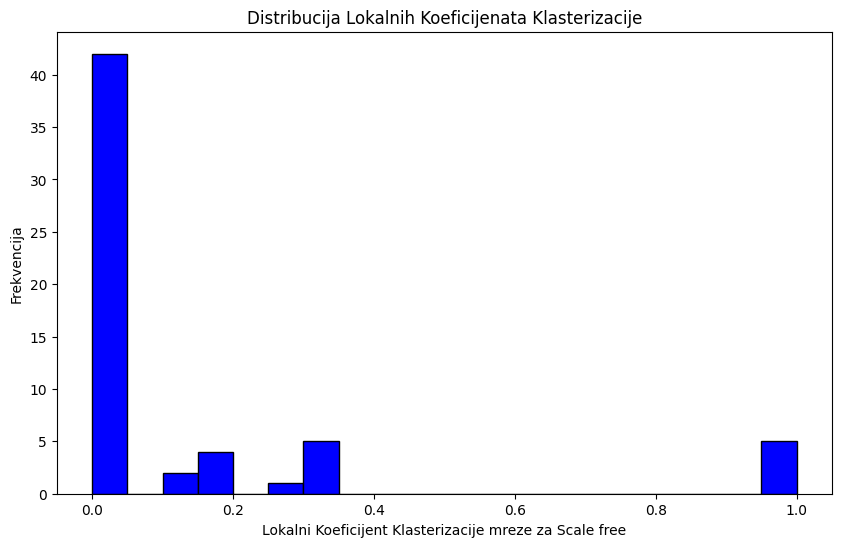

In [62]:
# Parametri mreže
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Generisanje Erdos-Renyi mreže
p = num_edges / (num_nodes * (num_nodes - 1) / 2)
G_erdos_renyi = nx.erdos_renyi_graph(num_nodes, p)

# Izračunavanje lokalnog koeficijenta klasterizacije
local_clustering_erdos_renyi = nx.clustering(G_erdos_renyi)
local_clustering_values_erdos_renyi = list(local_clustering_erdos_renyi.values())

G_scale_free = nx.barabasi_albert_graph(num_nodes, 2)

# Izračunavanje lokalnog koeficijenta klasterizacije
local_clustering_scale_free = nx.clustering(G_scale_free)
local_clustering_values_scale_free = list(local_clustering_scale_free.values())

# # Generisanje scale-free mreže
# G_scale_free_directed = nx.scale_free_graph(num_nodes)
# G_scale_free = nx.Graph()

# for u, v in G_scale_free_directed.edges():
#     if u != v:  # Remove self-loops
#         if G_scale_free.has_edge(u, v):
#             G_scale_free[u][v]['weight'] += 1
#         else:
#             G_scale_free.add_edge(u, v, weight=1)

# Izračunavanje prosečnog i globalnog koeficijenta klasterizacije za Erdos-Renyi mrežu
average_clustering_er = nx.average_clustering(G_erdos_renyi)
global_clustering_er = nx.transitivity(G_erdos_renyi)

# Izračunavanje prosečnog i globalnog koeficijenta klasterizacije za scale-free mrežu
average_clustering_sf = nx.average_clustering(G_scale_free)
global_clustering_sf = nx.transitivity(G_scale_free)

# Prikaz rezultata
print(f"Erdos-Renyi mreža - Prosečni koeficijent klasterizacije: {average_clustering_er}")
print(f"Erdos-Renyi mreža - Globalni koeficijent klasterizacije: {global_clustering_er}")
print(f"Scale-free mreža - Prosečni koeficijent klasterizacije: {average_clustering_sf}")
print(f"Scale-free mreža - Globalni koeficijent klasterizacije: {global_clustering_sf}")

plt.figure(figsize=(10, 6))
plt.hist(local_clustering_erdos_renyi, bins=20, color='orange', edgecolor='black')
plt.title('Distribucija Lokalnih Koeficijenata Klasterizacije')
plt.xlabel('Lokalni Koeficijent Klasterizacije mreze sa Erdos - Renyi')
plt.ylabel('Frekvencija')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(local_clustering_values_scale_free, bins=20, color='blue', edgecolor='black')
plt.title('Distribucija Lokalnih Koeficijenata Klasterizacije')
plt.xlabel('Lokalni Koeficijent Klasterizacije mreze za Scale free')
plt.ylabel('Frekvencija')
plt.show()


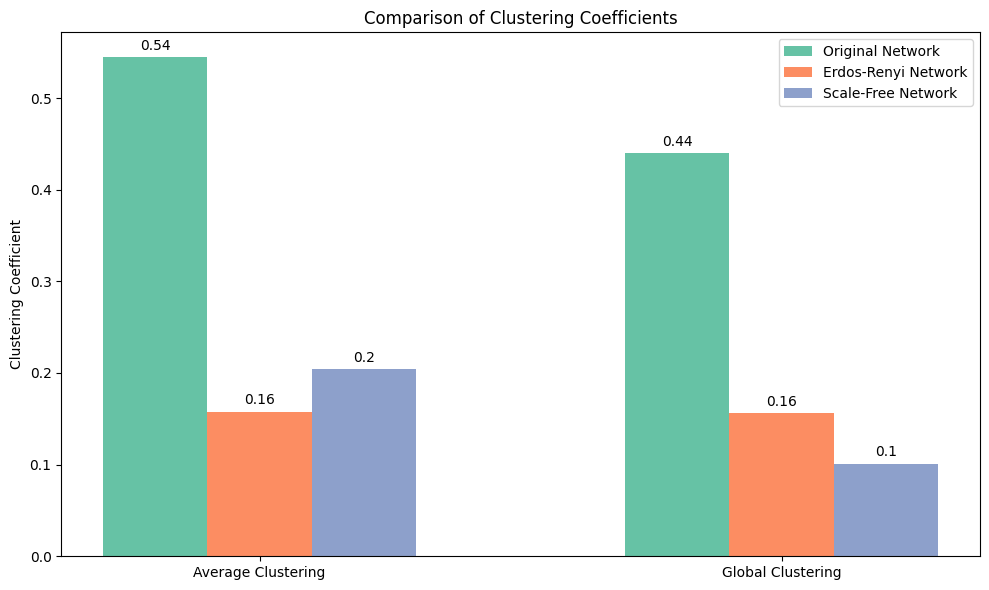

In [54]:
# Podaci za grafikon
labels = ['Average Clustering', 'Global Clustering']
original_network = [average_clustering, global_clustering]
erdos_renyi_network = [average_clustering_er, global_clustering_er]
scale_free_network = [average_clustering_sf, global_clustering_sf]

# Kreiranje bar grafikona
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, original_network, width, label='Original Network')
rects2 = ax.bar(x, erdos_renyi_network, width, label='Erdos-Renyi Network')
rects3 = ax.bar(x + width, scale_free_network, width, label='Scale-Free Network')

# Dodavanje oznaka
ax.set_ylabel('Clustering Coefficient')
ax.set_title('Comparison of Clustering Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Dodavanje vrednosti na vrh stubova
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

# Prikazivanje grafikona
plt.show()


#### U kojoj meri autori imaju tendenciju da pišu publikacije sa istim koautorima

In [41]:
from collections import defaultdict

# Brojanje zajedničkih radova za svaku dvojku koautora
collaboration_counts = defaultdict(int)
for index, row in epidemiologija_df.iterrows():
    authors = [author.strip() for author in row['Authors'].split(',')]
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            author1, author2 = authors[i], authors[j]
            collaboration_counts[(author1, author2)] += 1

# Analiza distribucije broja radova za svaku dvojku koautora
collaborations = list(collaboration_counts.values())
average_collaborations = np.mean(collaborations)
std_collaborations = np.std(collaborations)

# Prikaz rezultata
print(f"Prosečan broj zajedničkih radova po paru koautora: {average_collaborations:.2f}")
print(f"Standardna devijacija broja zajedničkih radova po paru koautora: {std_collaborations:.2f}")


Prosečan broj zajedničkih radova po paru koautora: 2.50
Standardna devijacija broja zajedničkih radova po paru koautora: 1.99


#### Procena osobina malog sveta
- Mreže malog sveta imaju relativno visoke koeficijente klasterizacije u poređenju sa slučajnim mrežama i male prosečne dužine puta.
- Upoređivanje sa Erdos-Renyi mrežama će nam pomoći da procenimo da li naša mreža ima ove osobine -> Ako prosečan koeficijent klasterizacije originalne mreže značajno prelazi onaj iz Erdos-Renyi mreže, a prosečna dužina puta ostaje slična, tada možemo reći da mreža ima osobine malog sveta.

#### Asortativnost u mreži 
- Tendenciju čvorova da se povezuju sa drugim čvorovima sličnih svojstava
- U slučaju stepena čvora, asortativnost se meri tendencijom čvorova da se povezuju sa čvorovima sličnog stepena

Koeficijent asortativnosti po stepenu čvora: -0.052999315137545425


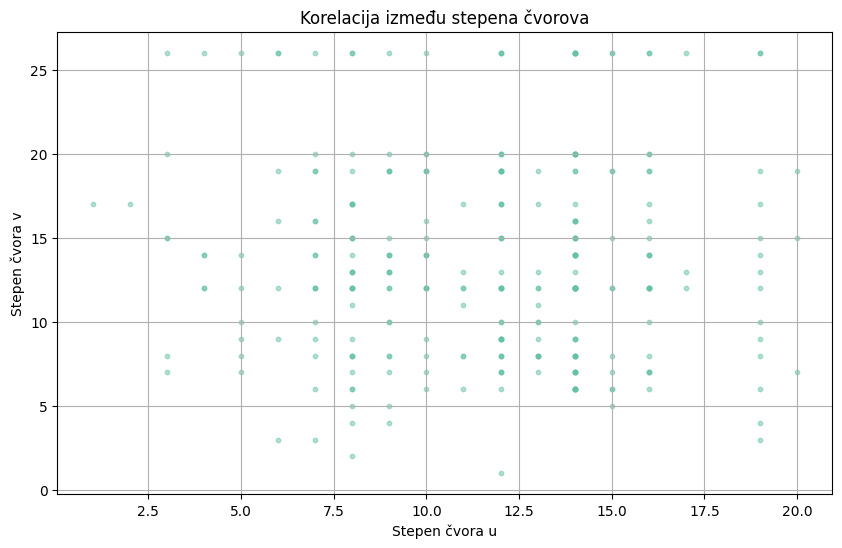

In [42]:
# Izračunavanje koeficijenta asortativnosti po stepenu čvora
assortativity_coefficient = nx.degree_assortativity_coefficient(G)

# Prikaz rezultata
print(f"Koeficijent asortativnosti po stepenu čvora: {assortativity_coefficient}")

import matplotlib.pyplot as plt

# Vizualizaciju
degree_dict = dict(G.degree())
degree_pairs = [(degree_dict[u], degree_dict[v]) for u, v in G.edges()]
degree_u, degree_v = zip(*degree_pairs)

# Scatter plot za korelaciju između stepena čvorova
plt.figure(figsize=(10, 6))
plt.scatter(degree_u, degree_v, alpha=0.5, s=10)
plt.xlabel('Stepen čvora u')
plt.ylabel('Stepen čvora v')
plt.title('Korelacija između stepena čvorova')
plt.grid(True)
plt.show()



#### Fenomen kluba bogatih

Tendencija visoko povezanih čvorova da budu međusobno povezani više nego što bi se očekivalo u slučajnoj mreži.

- Izračunavanje koeficijenta bogatog kluba za originalnu mrežu.
- Generisanje slučajne mreže sa istim stepenom raspodele koristeći Havel-Hakimi algoritam.
- Poređenje koeficijenta bogatog kluba originalne mreže sa slučajnom mrežom.

In [43]:
# Uklanjanje self loops
G_no_self_loops = G.copy()
G_no_self_loops.remove_edges_from(nx.selfloop_edges(G_no_self_loops))

# Provera da li postoje self loops nakon uklanjanja
print(f"Self loops num nakon uklanjanja: {nx.number_of_selfloops(G_no_self_loops)}")


# Izračunavanje koeficijenta bogatog kluba za originalnu mrežu
rich_club_coeff = nx.rich_club_coefficient(G_no_self_loops, normalized=False)

# Prikaz rezultata
print("Koeficijent bogatog kluba za originalnu mrežu:")
for k, r in rich_club_coeff.items():
    print(f"k = {k}, r = {r}")


Self loops num nakon uklanjanja: 0
Koeficijent bogatog kluba za originalnu mrežu:
k = 0, r = 0.17483363581367212
k = 1, r = 0.18636363636363637
k = 2, r = 0.1919191919191919
k = 3, r = 0.2081447963800905
k = 4, r = 0.21877551020408162
k = 5, r = 0.22872340425531915
k = 6, r = 0.24841437632135308
k = 7, r = 0.27530364372469635
k = 8, r = 0.3225806451612903
k = 9, r = 0.3646723646723647
k = 10, r = 0.38405797101449274
k = 11, r = 0.38405797101449274
k = 12, r = 0.4485294117647059
k = 13, r = 0.5238095238095238
k = 14, r = 0.6111111111111112
k = 15, r = 0.6666666666666666
k = 16, r = 0.6
k = 17, r = 0.6666666666666666
k = 18, r = 0.6666666666666666
k = 19, r = 0.0


In [44]:
# Generisanje slučajne mreže sa istom stepenom raspodele koristeći Havel-Hakimi algoritam
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
G_havel_hakimi = nx.havel_hakimi_graph(degree_sequence)

# Izračunavanje koeficijenta bogatog kluba za slučajnu mrežu
rich_club_coeff_hh = nx.rich_club_coefficient(G_havel_hakimi, normalized=False)

# Prikaz rezultata
print("Koeficijent bogatog kluba za Havel-Hakimi mrežu:")
for k, r in rich_club_coeff_hh.items():
    print(f"k = {k}, r = {r}")


Koeficijent bogatog kluba za Havel-Hakimi mrežu:
k = 0, r = 0.17543859649122806
k = 1, r = 0.18766233766233767
k = 2, r = 0.19326599326599325
k = 3, r = 0.2119155354449472
k = 4, r = 0.22448979591836735
k = 5, r = 0.23581560283687944
k = 6, r = 0.266384778012685
k = 7, r = 0.30634278002699056
k = 8, r = 0.38911290322580644
k = 9, r = 0.46296296296296297
k = 10, r = 0.5166666666666667
k = 11, r = 0.5253623188405797
k = 12, r = 0.7426470588235294
k = 13, r = 0.819047619047619
k = 14, r = 1.0
k = 15, r = 1.0
k = 16, r = 1.0
k = 17, r = 1.0
k = 18, r = 1.0
k = 19, r = 1.0


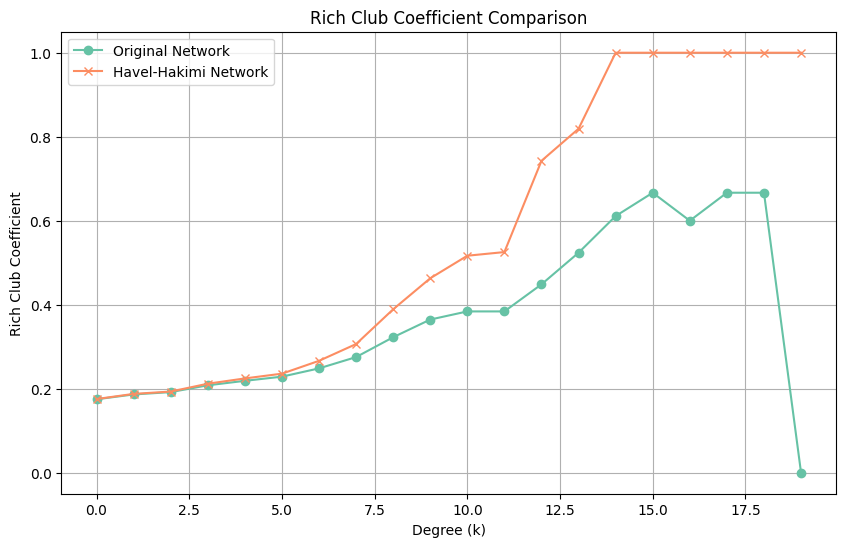

In [45]:
# Priprema podataka za poređenje
k_values = sorted(rich_club_coeff.keys())
rich_club_values_original = [rich_club_coeff[k] for k in k_values]
rich_club_values_hh = [rich_club_coeff_hh[k] for k in k_values]

# Vizualizacija poređenja
plt.figure(figsize=(10, 6))
plt.plot(k_values, rich_club_values_original, label='Original Network', marker='o')
plt.plot(k_values, rich_club_values_hh, label='Havel-Hakimi Network', marker='x')
plt.xlabel('Degree (k)')
plt.ylabel('Rich Club Coefficient')
plt.title('Rich Club Coefficient Comparison')
plt.legend()
plt.grid(True)
plt.show()


#### Distribucija čvorova po stepenu; Da li prati power law raspodelu?
- Izračunati distribuciju stepena čvorova.
- Fittovati power law distribuciju na podatke i proceniti njeno slaganje

Counter({8: 7, 12: 7, 14: 6, 7: 5, 6: 4, 9: 4, 10: 3, 3: 3, 1: 2, 19: 2, 5: 2, 16: 2, 4: 2, 15: 2, 13: 2, 20: 1, 17: 1, 26: 1, 11: 1, 2: 1, 0: 1})


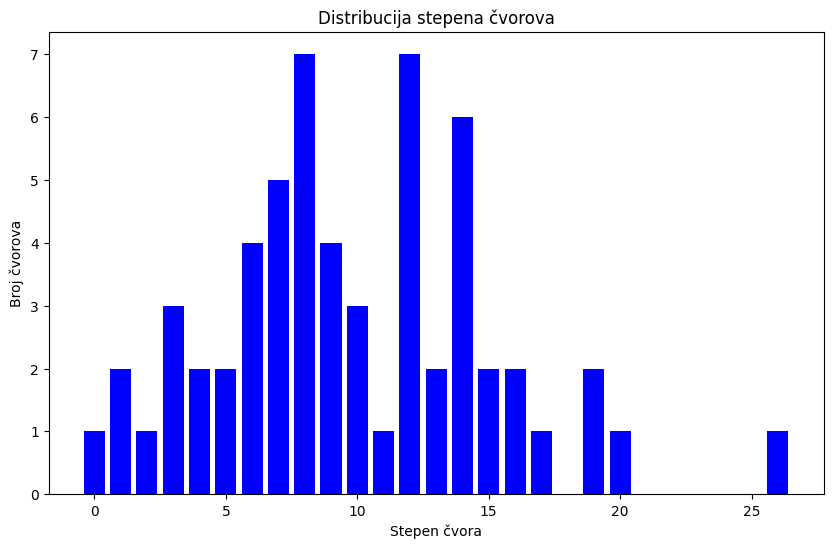

In [63]:
from collections import Counter

# Izračunavanje stepena čvorova
degree_sequence = [d for n, d in G.degree()]

# Prikaz distribucije stepena čvorova
degree_count = Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

print(degree_count)

plt.figure(figsize=(10, 6))
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Distribucija stepena čvorova")
plt.xlabel("Stepen čvora")
plt.ylabel("Broj čvorova")
plt.show()


Exponent (alfa) za power law distribuciju: 1.4684087982465563


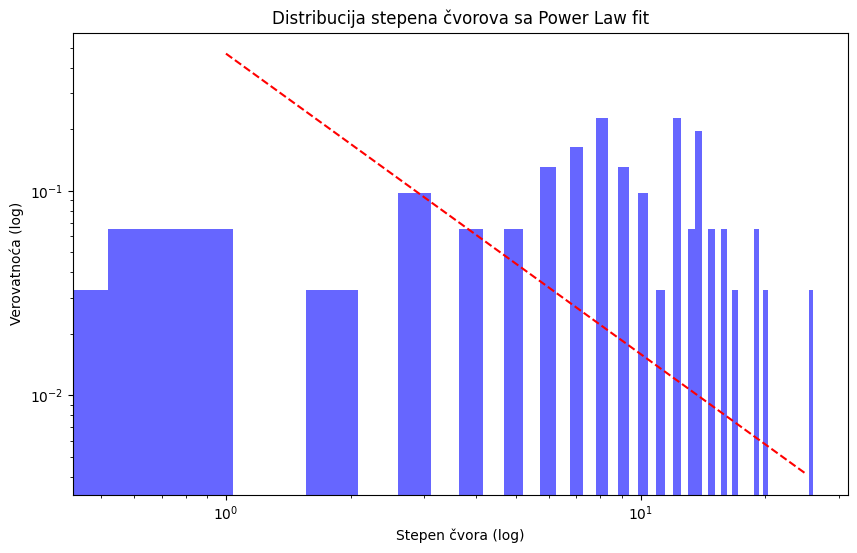

In [47]:
from scipy import stats

# Funkcija za fittovanje power law distribucije
def fit_power_law(data, xmin=1):
    data = np.array(data)
    data = data[data >= xmin]
    n = len(data)
    alpha = 1 + n / np.sum(np.log(data / xmin))
    return alpha

# Fittovanje power law distribucije
alpha = fit_power_law(degree_sequence, xmin=1)
print(f"Exponent (alfa) za power law distribuciju: {alpha}")

# Vizualizacija distribucije na log-log skali
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=50, density=True, log=True, alpha=0.6, color='b')
xmin = 1
x = np.arange(xmin, max(degree_sequence))
pdf = (alpha-1) * xmin**(alpha-1) * x**(-alpha)
plt.plot(x, pdf, color='r', linestyle='--')
plt.title("Distribucija stepena čvorova sa Power Law fit")
plt.xlabel("Stepen čvora (log)")
plt.ylabel("Verovatnoća (log)")
plt.xscale('log')
plt.yscale('log')
plt.show()


#### Analize centralnosti po stepenu, bliskosti i relacionoj centralnosti

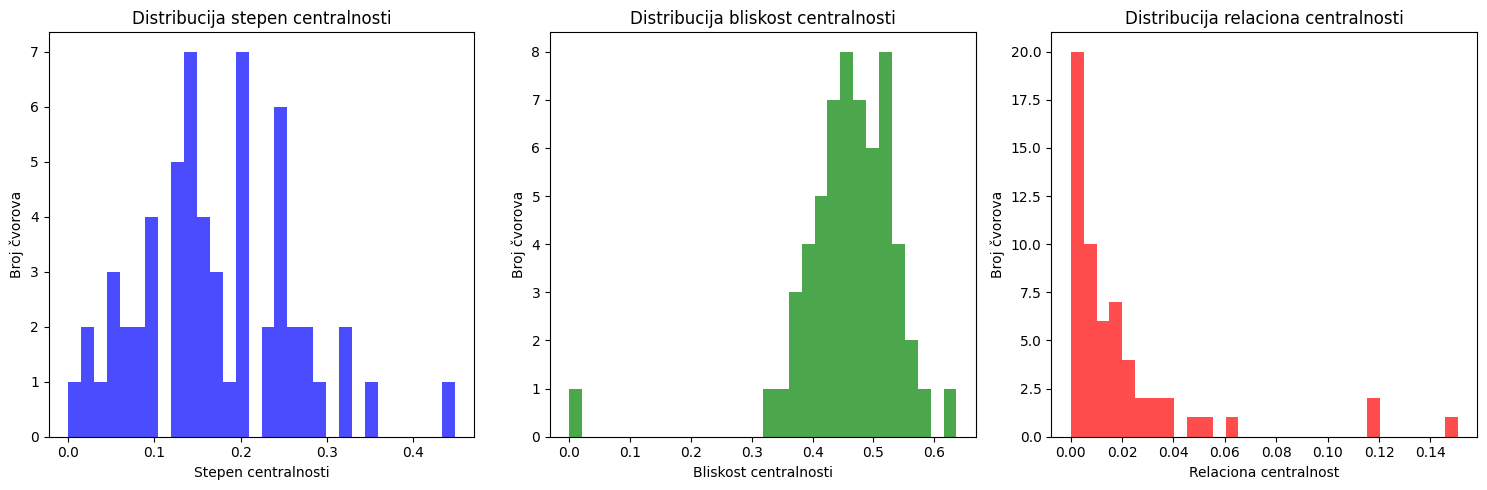

Author  Degree Centrality  Closeness Centrality  \
12    Markovic M.           0.448276              0.636560   
8   Pekmezovic T.           0.293103              0.560172   
31     Vukovic D.           0.327586              0.583513   
2    Lazarevic I.           0.344828              0.538627   
6   Stevanovic G.           0.327586              0.554626   

    Betweenness Centrality  
12                0.150666  
8                 0.120209  
31                0.119408  
2                 0.065060  
6                 0.053792

In [74]:
# Izračunavanje stepen centralnosti
degree_centrality = nx.degree_centrality(G)

# Izračunavanje bliskost centralnosti
closeness_centrality = nx.closeness_centrality(G)

# Izračunavanje relaciona centralnosti
betweenness_centrality = nx.betweenness_centrality(G)

# Kreiranje DataFrame-a za prikaz rezultata
centrality_df = pd.DataFrame({
    'Author': list(G.nodes()),
    'Degree Centrality': [degree_centrality[node] for node in G.nodes()],
    'Closeness Centrality': [closeness_centrality[node] for node in G.nodes()],
    'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes()]
})

# Vizualizacija centralnosti
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(list(degree_centrality.values()), bins=30, color='b', alpha=0.7)
plt.title('Distribucija stepen centralnosti')
plt.xlabel('Stepen centralnosti')
plt.ylabel('Broj čvorova')

plt.subplot(1, 3, 2)
plt.hist(list(closeness_centrality.values()), bins=30, color='g', alpha=0.7)
plt.title('Distribucija bliskost centralnosti')
plt.xlabel('Bliskost centralnosti')
plt.ylabel('Broj čvorova')

plt.subplot(1, 3, 3)
plt.hist(list(betweenness_centrality.values()), bins=30, color='r', alpha=0.7)
plt.title('Distribucija relaciona centralnosti')
plt.xlabel('Relaciona centralnost')
plt.ylabel('Broj čvorova')

plt.tight_layout()
plt.show()

# centrality_df.sort_values(by='Degree Centrality', ascending=False).head(5)

# centrality_df.sort_values(by='Closeness Centrality', ascending=False).head(5)

centrality_df.sort_values(by='Betweenness Centrality', ascending=False).head(5)

#### Centralnost po sopstvenom vektoru (Eigenvector Centrality)
- Meri uticaj čvorova u mreži uzimajući u obzir ne samo broj veza koje čvor ima, već i važnost čvorova na koje je povezan. 
- Čvor sa visokom centralnošću po sopstvenom vektoru je povezan sa mnogim čvorovima koji su sami po sebi visoko centralni.

Ovi čvorovi su ključni za strukturu mreže i imaju veliki uticaj na komunikaciju i informisanje unutar mreže.
Često su to centralne ličnosti, lideri ili vrlo aktivni istraživači koji su povezani sa mnogim drugim uticajnim autorima.
Uticaj na mrežu: Oni igraju ključnu ulogu u širenju informacija i resursa kroz mrežu.
Njihov gubitak bi značajno uticao na povezivost i efikasnost mreže.

           Author  Eigenvector Centrality
57    Markovic M.                0.297862
56  Stevanovic G.                0.249746
50   Lazarevic I.                0.245141
5      Nikolic N.                0.232656
17       Korac M.                0.220010
1     Mitrovic N.                0.204864
11   Milosevic I.                0.203534
27     Bojovic K.                0.190950
51       Cupic M.                0.187094
41      Poluga J.                0.180495


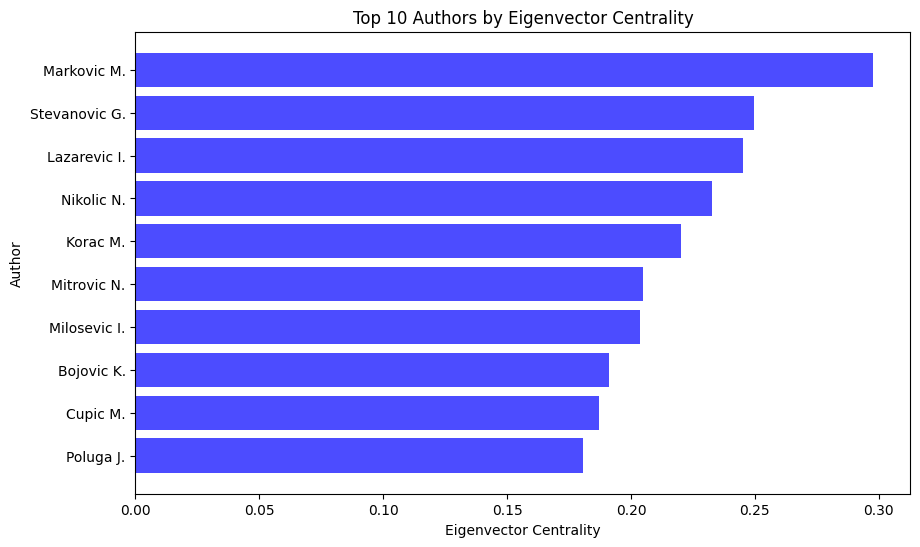

In [49]:
# Izračunavanje centralnosti po sopstvenom vektoru
eigenvector_centrality = nx.eigenvector_centrality(G)

# Kreiranje DataFrame-a za prikaz rezultata
eigenvector_centrality_df = pd.DataFrame({
    'Author': list(G.nodes()),
    'Eigenvector Centrality': [eigenvector_centrality[node] for node in G.nodes()]
})

# Sortiranje DataFrame-a po centralnosti po sopstvenom vektoru
eigenvector_centrality_df = eigenvector_centrality_df.sort_values(by='Eigenvector Centrality', ascending=False)

# Prikazivanje prvih nekoliko rezultata
print(eigenvector_centrality_df.head(10))

# Vizualizacija centralnosti po sopstvenom vektoru
plt.figure(figsize=(10, 6))
plt.barh(eigenvector_centrality_df['Author'].head(10), eigenvector_centrality_df['Eigenvector Centrality'].head(10), color='b', alpha=0.7)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Author')
plt.title('Top 10 Authors by Eigenvector Centrality')
plt.gca().invert_yaxis()
plt.show()

#### Kompozitna mera centralnosti
- Normalizacija svih centralnosti: Da bismo metrike mogli da kombinujemo, moramo ih prvo normalizovati tako da sve vrednosti budu između 0 i 1.
- Kombinacija metrika: Izračunaćemo kompozitnu meru centralnosti kao ponderisani zbir normalizovanih metrika.
- Identifikacija najvažnijih aktera: Pronaći ćemo čvorove sa najvišim vrednostima kompozitne mere centralnosti.

In [76]:
# Izračunavanje različitih metrika centralnosti
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Normalizacija centralnosti (sve vrednosti između 0 i 1)
def normalize(values):
    min_val = min(values)
    max_val = max(values)
    return [(val - min_val) / (max_val - min_val) for val in values]

# Kreiranje DataFrame-a za centralnosti
centrality_df = pd.DataFrame({
    'Author': list(G.nodes()),
    'Degree Centrality': normalize([degree_centrality[node] for node in G.nodes()]),
    'Closeness Centrality': normalize([closeness_centrality[node] for node in G.nodes()]),
    'Betweenness Centrality': normalize([betweenness_centrality[node] for node in G.nodes()]),
    'Eigenvector Centrality': normalize([eigenvector_centrality[node] for node in G.nodes()])
})


Author  Degree Centrality  Closeness Centrality  \
0       Stamenkovic M.           0.230769              0.715447   
1          Mitrovic S.           0.307692              0.727273   
2         Lazarevic I.           0.769231              0.846154   
3  Vuckovic-Opavski N.           0.038462              0.523810   
4            Dzamic A.           0.269231              0.676923   
5        Maksimovic J.           0.461538              0.727273   
6        Stevanovic G.           0.730769              0.871287   
7         Milosevic E.           0.192308              0.661654   
8        Pekmezovic T.           0.653846              0.880000   
9           Bojovic K.           0.538462              0.785714   

   Betweenness Centrality  Eigenvector Centrality  
0                0.031075                0.271260  
1                0.077055                0.228818  
2                0.431816                0.822999  
3                0.000000                0.031543  
4                0.054324                0.200516  
5                0.097858                0.320240  
6                0.357030                0.838461  
7                0.001004                0.210313  
8                0.797852                0.517137  
9                0.125462                0.641067

In [77]:
# Definisanje težina za svaku centralnost (možete prilagoditi prema potrebama)
weights = {
    'Degree Centrality': 0.25,
    'Closeness Centrality': 0.25,
    'Betweenness Centrality': 0.25,
    'Eigenvector Centrality': 0.25
}

# Izračunavanje kompozitne mere centralnosti
centrality_df['Composite Centrality'] = (
    weights['Degree Centrality'] * centrality_df['Degree Centrality'] +
    weights['Closeness Centrality'] * centrality_df['Closeness Centrality'] +
    weights['Betweenness Centrality'] * centrality_df['Betweenness Centrality'] +
    weights['Eigenvector Centrality'] * centrality_df['Eigenvector Centrality']
)

# Sortiranje po kompozitnoj meri centralnosti
centrality_df = centrality_df.sort_values(by='Composite Centrality', ascending=False)

# Prikazivanje prvih nekoliko rezultata
centrality_df.head(10)


Author  Degree Centrality  Closeness Centrality  \
12    Markovic M.           1.000000              1.000000   
31     Vukovic D.           0.730769              0.916667   
2    Lazarevic I.           0.769231              0.846154   
8   Pekmezovic T.           0.653846              0.880000   
6   Stevanovic G.           0.730769              0.871287   
15       Korac M.           0.615385              0.862745   
25     Nikolic N.           0.615385              0.800000   
39       Cupic M.           0.576923              0.822430   
24   Trajkovic V.           0.576923              0.838095   
10   Milosevic I.           0.538462              0.807339   

    Betweenness Centrality  Eigenvector Centrality  Composite Centrality  
12                1.000000                1.000000              1.000000  
31                0.792529                0.605431              0.761349  
2                 0.431816                0.822999              0.717550  
8                 0.797852                0.517137              0.712209  
6                 0.357030                0.838461              0.699387  
15                0.259257                0.738629              0.619004  
25                0.109783                0.781087              0.576564  
39                0.221757                0.628124              0.562309  
24                0.239975                0.536467              0.547865  
10                0.109651                0.683315              0.534692

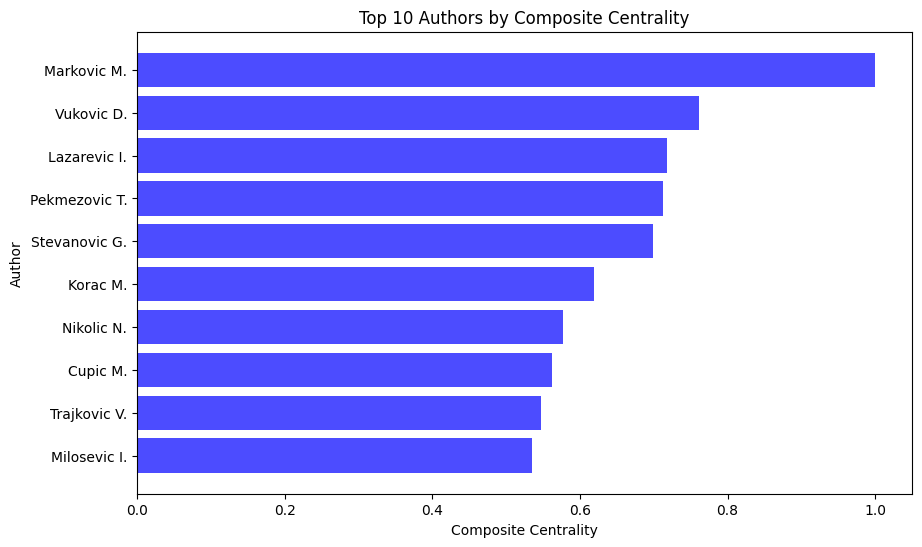

In [52]:
# Vizualizacija najvažnijih aktera po kompozitnoj meri centralnosti
plt.figure(figsize=(10, 6))
plt.barh(centrality_df['Author'].head(10), centrality_df['Composite Centrality'].head(10), color='b', alpha=0.7)
plt.xlabel('Composite Centrality')
plt.ylabel('Author')
plt.title('Top 10 Authors by Composite Centrality')
plt.gca().invert_yaxis()
plt.show()


#### Da li autori sa različitih katedri međusobno sarađuju i u kojoj meri? Ko su autori koji povezuju različite grupe u okviru mreže?
- Identifikacija katedri za svakog autora.
- Analiza međusobne saradnje između katedri.
- Identifikacija autora koji povezuju različite grupe (mostovi).

In [53]:
# Kreiranje mape autora i njihovih katedri
author_to_department = dict(zip(autori_df['Short Name'], autori_df['Katedra']))

# Provera
print(author_to_department)

{'Jovanovic T.': 'Katedra za mikrobiologiju', 'Savic B.': 'Katedra za mikrobiologiju', 'Mitrovic S.': 'Katedra za mikrobiologiju', 'Ranin L.': 'Katedra za mikrobiologiju', 'Arsic-Arsenijevic V.': 'Katedra za mikrobiologiju', 'Djukic S.': 'Katedra za mikrobiologiju', 'Cupic M.': 'Katedra za mikrobiologiju', 'Vuckovic-Opavski N.': 'Katedra za mikrobiologiju', 'Dzamic A.': 'Katedra za mikrobiologiju', 'Vukovic D.': 'Katedra za mikrobiologiju', 'Dakic I.': 'Katedra za mikrobiologiju', 'Knezevic A.': 'Katedra za mikrobiologiju', 'Lazarevic I.': 'Katedra za mikrobiologiju', 'Stanojevic M.': 'Katedra za mikrobiologiju', 'Mijac V.': 'Katedra za mikrobiologiju', 'Cirkovic I.': 'Katedra za mikrobiologiju', 'Colovic-Colovski I.': 'Katedra za mikrobiologiju', 'Banko A.': 'Katedra za mikrobiologiju', 'Gajic I.': 'Katedra za mikrobiologiju', 'Arandjelovic I.': 'Katedra za mikrobiologiju', 'Dubljanin E.': 'Katedra za mikrobiologiju', 'Miljanovic D.': 'Katedra za mikrobiologiju', 'Jankovic M.': 'Kated

In [54]:
# Kreiranje matrice saradnje između katedri
department_collaboration = defaultdict(lambda: defaultdict(int))

for u, v in G.edges():
    dept_u = author_to_department.get(u, None)
    dept_v = author_to_department.get(v, None)
    if dept_u and dept_v:
        department_collaboration[dept_u][dept_v] += 1
        department_collaboration[dept_v][dept_u] += 1  # Za neusmerenu mrežu

# Prikaz matrice saradnje između katedri
collab_df = pd.DataFrame(department_collaboration).fillna(0).astype(int)
print(collab_df)


                           Katedra za epidemiologiju  \
Katedra za mikrobiologiju                         22   
Katedra za epidemiologiju                         86   
Infektivne bolesti                                12   
Katedra za imunologiju                             9   

                           Katedra za mikrobiologiju  Infektivne bolesti  \
Katedra za mikrobiologiju                        134                  27   
Katedra za epidemiologiju                         22                  12   
Infektivne bolesti                                27                 106   
Katedra za imunologiju                            28                  10   

                           Katedra za imunologiju  
Katedra za mikrobiologiju                      28  
Katedra za epidemiologiju                       9  
Infektivne bolesti                             10  
Katedra za imunologiju                         38  


In [55]:
# Izračunavanje betweenness centralnosti za sve čvorove
betweenness_centrality = nx.betweenness_centrality(G)

# Izračunavanje edge betweenness centralnosti za sve grane
edge_betweenness_centrality = nx.edge_betweenness_centrality(G)

# Identifikacija najvažnijih mostova (autora sa visokom betweenness centralnošću)
most_important_authors = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
print("Top 10 most important authors by betweenness centrality:")
for author, centrality in most_important_authors:
    print(f"Author: {author}, Betweenness Centrality: {centrality:.4f}")

# Identifikacija najvažnijih mostova (grana sa visokom edge betweenness centralnošću)
most_important_edges = sorted(edge_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
print("\nTop 10 most important edges by edge betweenness centrality:")
for (u, v), centrality in most_important_edges:
    print(f"Edge: ({u}, {v}), Edge Betweenness Centrality: {centrality:.4f}")


Top 10 most important authors by betweenness centrality:
Author: Markovic M., Betweenness Centrality: 0.1507
Author: Pekmezovic T., Betweenness Centrality: 0.1202
Author: Vukovic D., Betweenness Centrality: 0.1194
Author: Lazarevic I., Betweenness Centrality: 0.0651
Author: Stevanovic G., Betweenness Centrality: 0.0538
Author: Ranin L., Betweenness Centrality: 0.0479
Author: Korac M., Betweenness Centrality: 0.0391
Author: Trajkovic V., Betweenness Centrality: 0.0362
Author: Mijac V., Betweenness Centrality: 0.0338
Author: Cupic M., Betweenness Centrality: 0.0334

Top 10 most important edges by edge betweenness centrality:
Edge: (Jankovic M., Pekmezovic T.), Edge Betweenness Centrality: 0.0333
Edge: (Ranin L., Vuckovic-Opavski N.), Edge Betweenness Centrality: 0.0333
Edge: (Jovanovic A., Pekmezovic T.), Edge Betweenness Centrality: 0.0290
Edge: (Vukovic D., Arandjelovic I.), Edge Betweenness Centrality: 0.0275
Edge: (Vukovic D., Pekmezovic T.), Edge Betweenness Centrality: 0.0265
Edge:

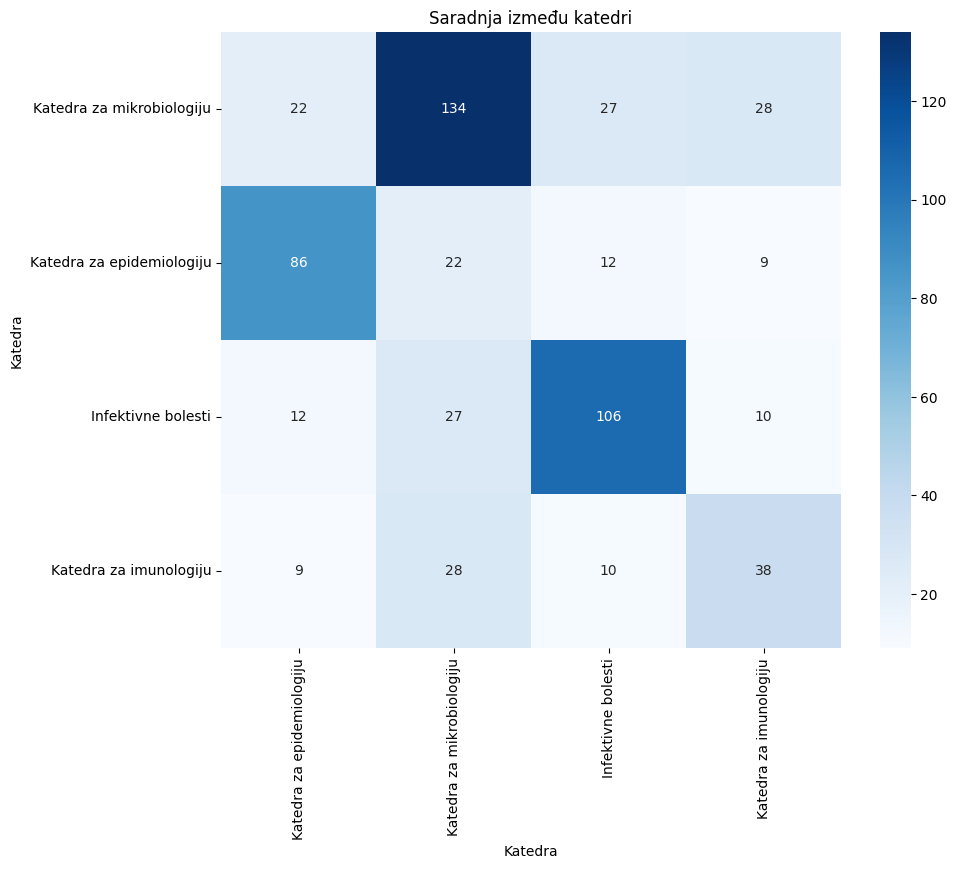

In [56]:
import seaborn as sns

# Vizualizacija matrice saradnje između katedri
plt.figure(figsize=(10, 8))
sns.heatmap(collab_df, annot=True, cmap='Blues', fmt='d')
plt.title('Saradnja između katedri')
plt.xlabel('Katedra')
plt.ylabel('Katedra')
plt.show()


In [86]:
# Razdvajanje svih autora i filtriranje onih koji nisu sa fakulteta
all_authors = combined_data['Authors'].str.split(',').sum()
all_authors = [author.strip() for author in all_authors if author.strip() not in faculty_authors]

# Brojanje pojavljivanja svakog autora koji nije sa fakulteta
author_counts = Counter(all_authors)

# Pronalaženje prvih 5 autora koji se najčešće pojavljuju, a nisu sa fakulteta
most_common_non_faculty_authors = author_counts.most_common(5)

# Prikazivanje rezultata
print("Prvih 5 autora koji se najčešće pojavljuju, a nisu sa fakulteta:")
for author, count in most_common_non_faculty_authors:
    print(f"{author}: {count} pojavljivanja")

print(most_common_non_faculty_authors)

Prvih 5 autora koji se najčešće pojavljuju, a nisu sa fakulteta:
Jevtovic D.: 105 pojavljivanja
Stepanovic S.: 92 pojavljivanja
Drulovic J.: 90 pojavljivanja
Delic D.: 88 pojavljivanja
Barac A.: 80 pojavljivanja
[('Jevtovic D.', 105), ('Stepanovic S.', 92), ('Drulovic J.', 90), ('Delic D.', 88), ('Barac A.', 80)]


In [57]:
# Export network to GEXF format
nx.write_gml(G, "network_coauthors.gml")

#### Detekcija komuna Luvenskom metodom

2. Uvoz podataka u Gephi
Otvorite Gephi i kreirajte novi projekat.
Idite na File -> Open i izaberite network_coauthors.gexf fajl koji ste prethodno sačuvali.
3. Detekcija komuna Luvenskom metodom
U Statistics panelu, izaberite Modularity.
Unesite vrednost parametra rezolucije i pokrenite analizu. Uobičajene vrednosti su 0.5, 1.0, i 2.0, ali možete isprobati i druge vrednosti u zavisnosti od mreže.
Nakon analize, pogledajte broj i veličinu detektovanih komuna.
4. Vizualizacija mreže
Idite na Partition panel.
Kliknite na Refresh i izaberite Modularity Class.
Kliknite na Apply da biste obojili čvorove u skladu sa njihovom komunu.
Koristite Layout alatke kao što su ForceAtlas 2 da biste dobili bolju vizualizaciju mreže.
5. Diskusija o izboru parametra rezolucije
Analizirajte kako promena parametra rezolucije utiče na broj i veličinu komuna:

Manje vrednosti rezolucije obično rezultiraju manjim brojem većih komuna.
Veće vrednosti rezolucije rezultiraju većim brojem manjih komuna.
Zaključak
Nakon što ste sproveli klasterisanje za tri različite vrednosti parametra rezolucije, zapišite broj i veličinu komuna za svaku vrednost. Vizualizujte rezultate i diskutujte koji parametar rezolucije daje najbolje rezultate za vašu mrežu u kontekstu analize koju želite da sprovedete.

Primer diskusije
Rezolucija 0.5: Može otkriti nekoliko velikih komuna koje grupišu većinu autora. Ovo može biti korisno za identifikaciju glavnih istraživačkih grupa.
Rezolucija 1.0: Uobičajena vrednost koja često daje uravnotežene rezultate sa srednjim brojem komuna.
Rezolucija 2.0: Može otkriti mnogo manjih komuna, što može biti korisno za detaljnu analizu manjih istraživačkih timova ili pojedinaca.
Ova analiza će vam pomoći da identifikujete optimalni parametar rezolucije za vašu mrežu i bolje razumete strukturu vaših komuna.

#### Detekcija komuna spektralnim klasterisanjem
- Izracuna se laplasijana
- Odabere se k (gleda se k gde se desio veliki skok na laplasijani)
- radi se klasterisanje

Spektralno klasterisanje je tehnika koja koristi svojstva Laplaceove matrice grafa da identifikuje komune u mreži. Evo najjednostavnijeg objašnjenja korak po korak:

Koraci spektralnog klasterisanja za detekciju komuna:

1) Kreiranje grafa:
    - Imamo mrežu čvorova (ljudi) povezanih vezama (koautorstvima).

2) Kreiranje matrice susedstva:
    - Matrica susedstva (adjacency matrix) A je kvadratna matrica gde A[i][j] predstavlja prisustvo veze između čvorova i i j.

3) Izračunavanje Laplaceove matrice:
    - Laplaceova matrica L se računa kao L = D - A, gde je D matrica stepena (degree matrix), a A matrica susedstva. 
    - Matrica stepena (D) je dijagonalna matrica koja sadrži informacije o stepenima čvorova u grafu. Stepen čvora je broj veza koje taj čvor ima.
    - Normalizovana Laplaceova matrica može biti korišćena da bolje skali matrica za klasterisanje.
    - Normalizovana Laplaceova matrica se koristi jer može bolje skalirati matricu za klasterisanje, naročito u slučajevima kada čvorovi imaju različite stepene. Normalizacija pomaže da se izbegnu problemi vezani za varijacije u stepenima čvorova, što može poboljšati performanse algoritama za klasterisanje.

4) Spektralna analiza:
    - Izračunavanje sopstvenih vrednosti (eigenvalues) i sopstvenih vektora (eigenvectors) Laplaceove matrice.
    - Sopstveni vektori se koriste za projektovanje čvorova u niže dimenzionalni prostor.
    - U spektralnom klasterisanju, sopstveni vektori odgovarajući najmanjim sopstvenim vrednostima (osim nule) se koriste za projektovanje čvorova u niže dimenzionalni prostor.
    - Onda se standardni algoritmi za klasterisanje, kao što je KMeans, mogu primeniti na te projektovane podatke da se identifikuju komune.

5) Klasterisanje sopstvenih vektora:
    - Sopstveni vektori koji odgovaraju najmanjim sopstvenim vrednostima (osim nule) se koriste kao ulaz u algoritam klasterisanja, kao što je KMeans, da bi se identifikovale komune.

Laplacian matrix is valid


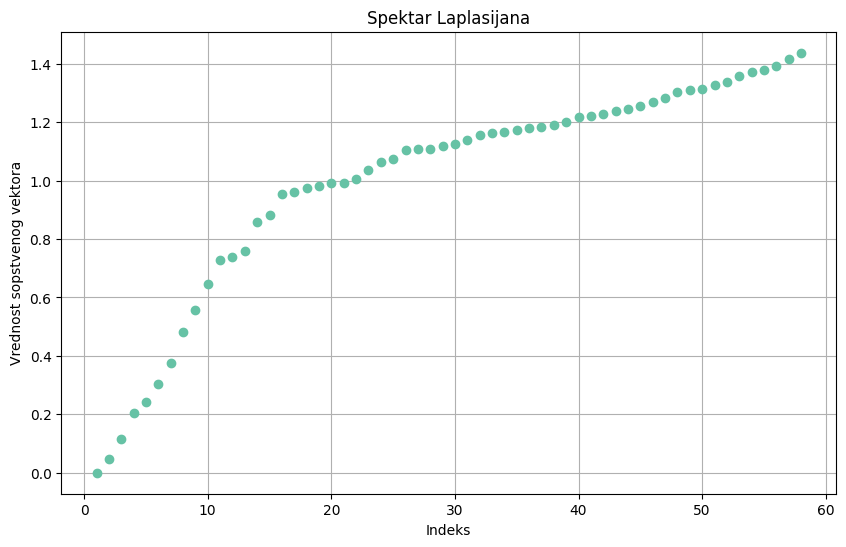

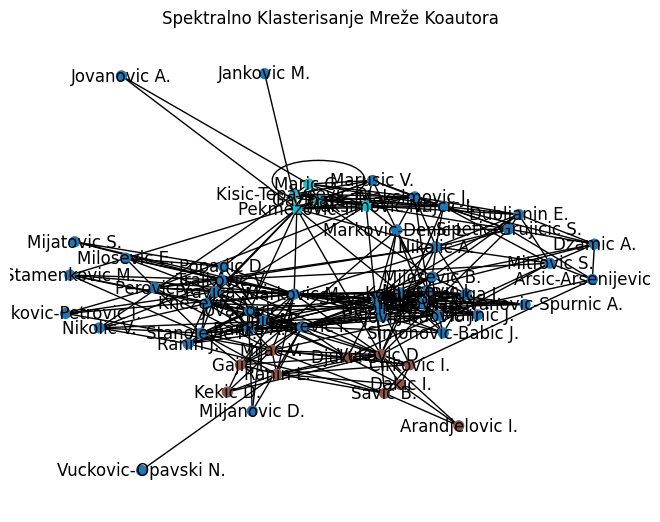

In [90]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Uklanjanje izolovanih cvorova
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Izračunavanje Laplasijana mreže
laplacian = nx.normalized_laplacian_matrix(G).todense()

if np.isnan(laplacian).any():
    print("Laplacian matrix contains NaN values")
else:
    print("Laplacian matrix is valid")

# Spektralna analiza
eigenvalues, eigenvectors = np.linalg.eigh(laplacian)

# Prikazivanje spektra Laplasijana
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o')
plt.xlabel('Indeks')
plt.ylabel('Vrednost sopstvenog vektora')
plt.title('Spektar Laplasijana')
plt.grid(True)
plt.show()

# Odabir broja klastera
num_clusters = 3

# KMeans klasterisanje koristeći sopstvene vektore
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(eigenvectors[:, 1:num_clusters+1])
labels = kmeans.labels_

# Dodavanje klaster oznaka čvorovima
for node, label in zip(G.nodes(), labels):
    G.nodes[node]['cluster'] = label

# Vizualizacija mreže sa klasterima
pos = nx.spring_layout(G, seed=42)
clusters = [G.nodes[node]['cluster'] for node in G.nodes()]
nx.draw(G, pos, node_color=clusters, with_labels=True, node_size=50, cmap=plt.cm.tab10)
plt.title('Spektralno Klasterisanje Mreže Koautora')
plt.show()

# Funkcija za konverziju atributa čvorova i ivica u stringove
def convert_attributes_to_strings(G):
    # Konverzija atributa čvorova
    for node, attrs in G.nodes(data=True):
        for attr, value in attrs.items():
            G.nodes[node][attr] = str(value)
    
    # Konverzija atributa ivica
    for u, v, attrs in G.edges(data=True):
        for attr, value in attrs.items():
            G[u][v][attr] = str(value)

convert_attributes_to_strings(G)
nx.write_gml(G, "spektralno_klasterisanje.gml")

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage
from networkx.algorithms.community import girvan_newman

# Primena Girvan-Newman metode
comp = girvan_newman(G)

communities = []
for communities_at_level in comp:
    communities.append(sorted(communities_at_level))
    if len(communities_at_level) >= 10:
        break

#### Detekcija komuna Girvan-Newman metodom
- Girvan-Newman metoda je algoritam za detekciju komuna u mreži koji radi tako što uklanja veze (edge) sa najvećom betweenness centralnošću dok se mreža ne raspadne u odvojene komune.
- Ova metoda prikazuje hijerarhijsku strukturu mreže koristeći dendogram.
- Pomaže u identifikaciji prirodne strukture mreže i razdvajanju na komune.

Koraci Girvan-Newman metode:

1) Izračunavanje betweenness centralnosti za sve veze:
    - Betweenness centralnost veze meri koliko puta ta veza leži na najkraćem putu između para čvorova.
    - Veze sa visokom betweenness centralnošću povezuju različite delove mreže.

2) Uklanjanje veze sa najvećom betweenness centralnošću:
    - Uklanja se veza sa najvećom betweenness centralnošću.
    - Ovaj korak se ponavlja dok se mreža ne raspadne u komune.
    - Ponovite proces


In [95]:
from scipy.spatial.distance import pdist, squareform

def draw_dendogram(G):
    # Kreiranje matrice shortest path udaljenosti
    distance_dict = dict(nx.all_pairs_shortest_path_length(G))
    nodes = list(G.nodes())
    distance_matrix = np.zeros((len(nodes), len(nodes)))

    for i, node1 in enumerate(nodes):
        for j, node2 in enumerate(nodes):
            if node1 in distance_dict and node2 in distance_dict[node1]:
                distance_matrix[i, j] = distance_dict[node1][node2]
            else:
                distance_matrix[i, j] = np.inf

    # Konvertovanje matrice udaljenosti u format pogodan za linkage funkciju
    dist_array = squareform(distance_matrix)

    # Kreiranje dendograma koristeći linkage funkciju
    Z = linkage(dist_array, method='ward')

    # Plotovanje dendograma
    plt.figure(figsize=(10, 7))
    dendrogram(Z, labels=nodes)
    plt.title('Dendrogram Konstruisan na Osnovu Pojedinačnih Čvorova')
    plt.xlabel('Čvorovi')
    plt.ylabel('Udaljenost')
    plt.show()


({'Stamenkovic M.', 'Mitrovic S.', 'Lazarevic I.', 'Dzamic A.', 'Maksimovic J.', 'Stevanovic G.', 'Milosevic E.', 'Pekmezovic T.', 'Bojovic K.', 'Milosevic I.', 'Markovic M.', 'Popadic D.', 'Sipetic-Grujicic S.', 'Nikolic V.', 'Korac M.', 'Jordovic J.', 'Dubljanin E.', 'Ranin L.', 'Mijatovic S.', 'Kekic D.', 'Gazibara T.', 'Djukic S.', 'Malinic J.', 'Trajkovic V.', 'Nikolic N.', 'Maksimovic N.', 'Markovic-Denic L.', 'Mijac V.', 'Vujcic I.', 'Arsic-Arsenijevic V.', 'Vukovic D.', 'Jankovic M.', 'Cirkovic I.', 'Perovic V.', 'Maric G.', 'Jovanovic T.', 'Nikolic A.', 'Vukovic-Petrovic I.', 'Radovanovic-Spurnic A.', 'Cupic M.', 'Poluga J.', 'Stanojevic M.', 'Simonovic-Babic J.', 'Mitrovic N.', 'Miljanovic D.', 'Kisic-Tepavcevic D.', 'Pravica V.', 'Arandjelovic I.', 'Dakic I.', 'Savic B.', 'Milosevic B.', 'Jovanovic A.', 'Knezevic A.', 'Banko A.', 'Ranin J.', 'Marusic V.', 'Gajic I.'}, {'Vuckovic-Opavski N.'})


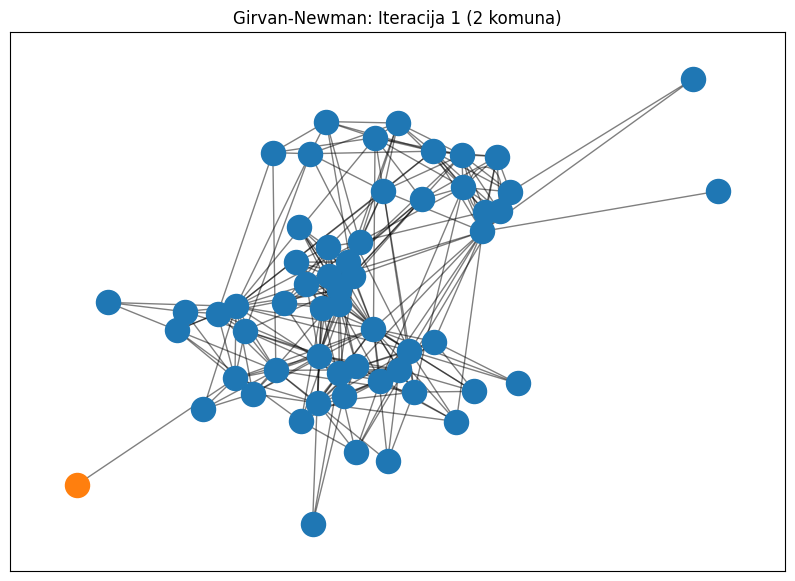

({'Stamenkovic M.', 'Mitrovic S.', 'Lazarevic I.', 'Dzamic A.', 'Maksimovic J.', 'Stevanovic G.', 'Milosevic E.', 'Pekmezovic T.', 'Bojovic K.', 'Milosevic I.', 'Markovic M.', 'Popadic D.', 'Sipetic-Grujicic S.', 'Nikolic V.', 'Korac M.', 'Jordovic J.', 'Dubljanin E.', 'Ranin L.', 'Mijatovic S.', 'Kekic D.', 'Gazibara T.', 'Djukic S.', 'Malinic J.', 'Trajkovic V.', 'Nikolic N.', 'Maksimovic N.', 'Markovic-Denic L.', 'Mijac V.', 'Vujcic I.', 'Arsic-Arsenijevic V.', 'Vukovic D.', 'Cirkovic I.', 'Perovic V.', 'Maric G.', 'Jovanovic T.', 'Nikolic A.', 'Vukovic-Petrovic I.', 'Radovanovic-Spurnic A.', 'Cupic M.', 'Poluga J.', 'Stanojevic M.', 'Simonovic-Babic J.', 'Mitrovic N.', 'Miljanovic D.', 'Kisic-Tepavcevic D.', 'Pravica V.', 'Arandjelovic I.', 'Dakic I.', 'Savic B.', 'Milosevic B.', 'Jovanovic A.', 'Knezevic A.', 'Banko A.', 'Ranin J.', 'Marusic V.', 'Gajic I.'}, {'Vuckovic-Opavski N.'}, {'Jankovic M.'})


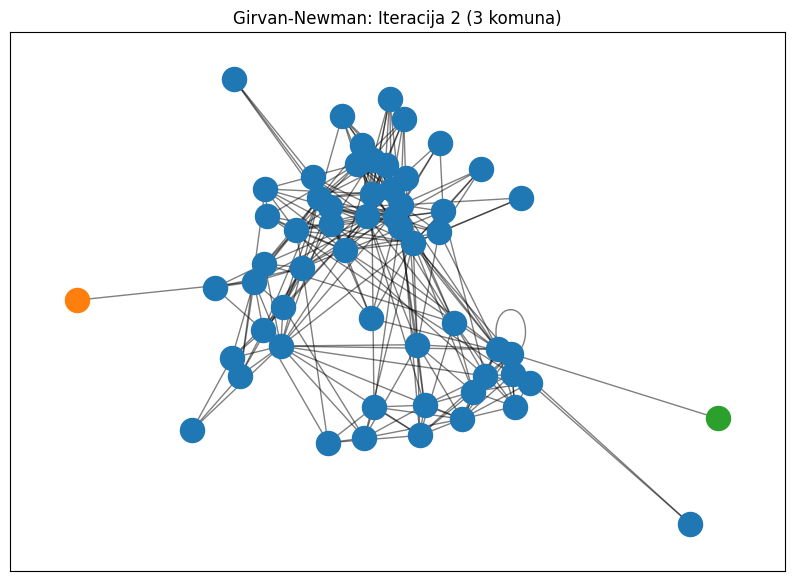

({'Stamenkovic M.', 'Mitrovic S.', 'Lazarevic I.', 'Dzamic A.', 'Maksimovic J.', 'Stevanovic G.', 'Milosevic E.', 'Pekmezovic T.', 'Bojovic K.', 'Milosevic I.', 'Markovic M.', 'Popadic D.', 'Sipetic-Grujicic S.', 'Nikolic V.', 'Korac M.', 'Jordovic J.', 'Dubljanin E.', 'Ranin L.', 'Mijatovic S.', 'Kekic D.', 'Gazibara T.', 'Djukic S.', 'Malinic J.', 'Trajkovic V.', 'Nikolic N.', 'Maksimovic N.', 'Markovic-Denic L.', 'Mijac V.', 'Vujcic I.', 'Arsic-Arsenijevic V.', 'Vukovic D.', 'Cirkovic I.', 'Perovic V.', 'Maric G.', 'Jovanovic T.', 'Nikolic A.', 'Vukovic-Petrovic I.', 'Radovanovic-Spurnic A.', 'Cupic M.', 'Poluga J.', 'Stanojevic M.', 'Simonovic-Babic J.', 'Mitrovic N.', 'Miljanovic D.', 'Kisic-Tepavcevic D.', 'Pravica V.', 'Arandjelovic I.', 'Dakic I.', 'Savic B.', 'Milosevic B.', 'Knezevic A.', 'Banko A.', 'Ranin J.', 'Marusic V.', 'Gajic I.'}, {'Vuckovic-Opavski N.'}, {'Jankovic M.'}, {'Jovanovic A.'})


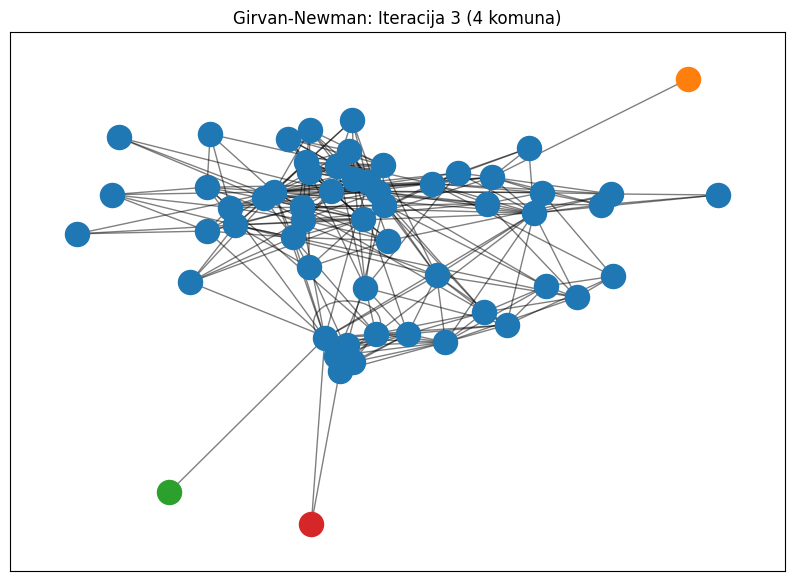

({'Stamenkovic M.', 'Mitrovic S.', 'Lazarevic I.', 'Dzamic A.', 'Maksimovic J.', 'Stevanovic G.', 'Milosevic E.', 'Pekmezovic T.', 'Bojovic K.', 'Milosevic I.', 'Markovic M.', 'Popadic D.', 'Sipetic-Grujicic S.', 'Nikolic V.', 'Korac M.', 'Jordovic J.', 'Dubljanin E.', 'Ranin L.', 'Kekic D.', 'Gazibara T.', 'Djukic S.', 'Malinic J.', 'Trajkovic V.', 'Nikolic N.', 'Maksimovic N.', 'Markovic-Denic L.', 'Mijac V.', 'Vujcic I.', 'Arsic-Arsenijevic V.', 'Vukovic D.', 'Cirkovic I.', 'Perovic V.', 'Maric G.', 'Jovanovic T.', 'Nikolic A.', 'Vukovic-Petrovic I.', 'Radovanovic-Spurnic A.', 'Cupic M.', 'Poluga J.', 'Stanojevic M.', 'Simonovic-Babic J.', 'Mitrovic N.', 'Miljanovic D.', 'Kisic-Tepavcevic D.', 'Pravica V.', 'Dakic I.', 'Arandjelovic I.', 'Savic B.', 'Milosevic B.', 'Knezevic A.', 'Banko A.', 'Ranin J.', 'Marusic V.', 'Gajic I.'}, {'Vuckovic-Opavski N.'}, {'Mijatovic S.'}, {'Jankovic M.'}, {'Jovanovic A.'})


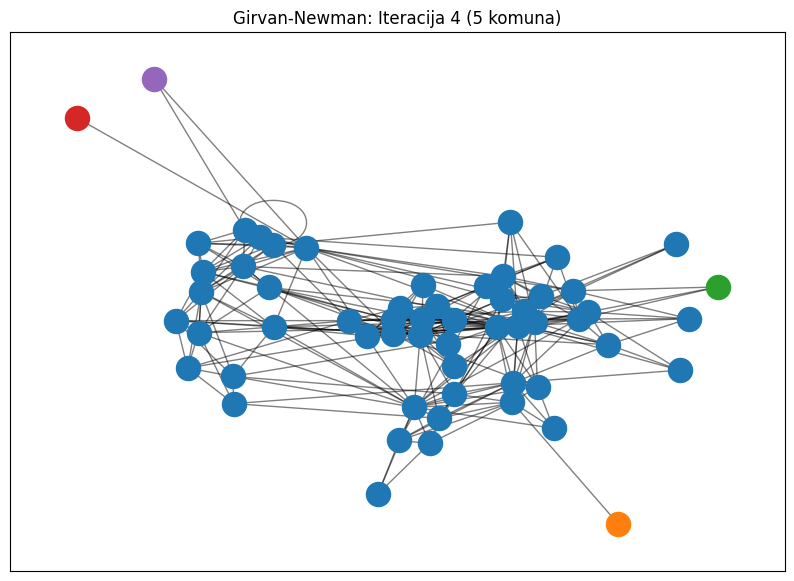

({'Stamenkovic M.', 'Mitrovic S.', 'Lazarevic I.', 'Dzamic A.', 'Maksimovic J.', 'Stevanovic G.', 'Milosevic E.', 'Pekmezovic T.', 'Bojovic K.', 'Milosevic I.', 'Markovic M.', 'Popadic D.', 'Sipetic-Grujicic S.', 'Nikolic V.', 'Korac M.', 'Jordovic J.', 'Dubljanin E.', 'Ranin L.', 'Kekic D.', 'Gazibara T.', 'Djukic S.', 'Malinic J.', 'Trajkovic V.', 'Nikolic N.', 'Maksimovic N.', 'Markovic-Denic L.', 'Mijac V.', 'Vujcic I.', 'Arsic-Arsenijevic V.', 'Vukovic D.', 'Cirkovic I.', 'Perovic V.', 'Maric G.', 'Jovanovic T.', 'Nikolic A.', 'Vukovic-Petrovic I.', 'Radovanovic-Spurnic A.', 'Cupic M.', 'Poluga J.', 'Stanojevic M.', 'Simonovic-Babic J.', 'Mitrovic N.', 'Miljanovic D.', 'Kisic-Tepavcevic D.', 'Pravica V.', 'Dakic I.', 'Savic B.', 'Milosevic B.', 'Knezevic A.', 'Banko A.', 'Ranin J.', 'Marusic V.', 'Gajic I.'}, {'Vuckovic-Opavski N.'}, {'Mijatovic S.'}, {'Jankovic M.'}, {'Arandjelovic I.'}, {'Jovanovic A.'})


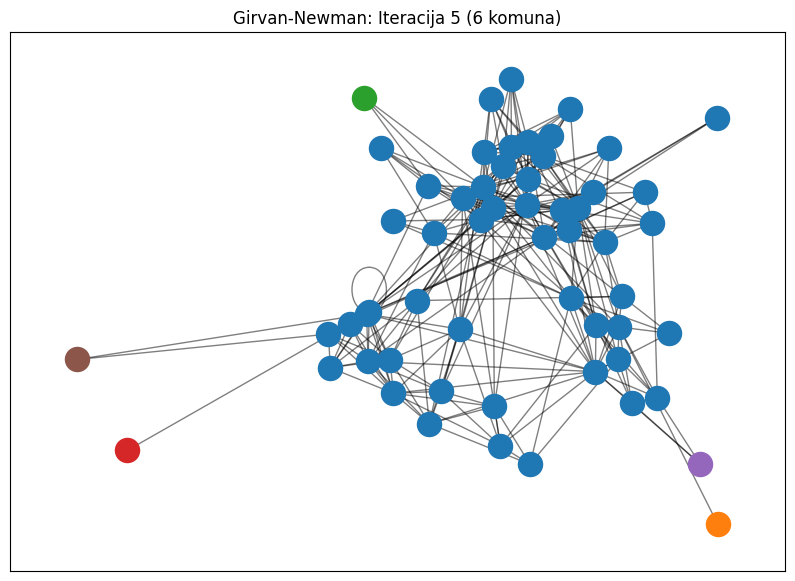

({'Stamenkovic M.', 'Lazarevic I.', 'Maksimovic J.', 'Stevanovic G.', 'Milosevic E.', 'Pekmezovic T.', 'Bojovic K.', 'Milosevic I.', 'Markovic M.', 'Popadic D.', 'Sipetic-Grujicic S.', 'Nikolic V.', 'Korac M.', 'Jordovic J.', 'Ranin L.', 'Kekic D.', 'Gazibara T.', 'Djukic S.', 'Malinic J.', 'Trajkovic V.', 'Nikolic N.', 'Maksimovic N.', 'Markovic-Denic L.', 'Mijac V.', 'Vujcic I.', 'Vukovic D.', 'Cirkovic I.', 'Perovic V.', 'Maric G.', 'Jovanovic T.', 'Nikolic A.', 'Vukovic-Petrovic I.', 'Radovanovic-Spurnic A.', 'Cupic M.', 'Poluga J.', 'Stanojevic M.', 'Simonovic-Babic J.', 'Mitrovic N.', 'Miljanovic D.', 'Kisic-Tepavcevic D.', 'Pravica V.', 'Dakic I.', 'Savic B.', 'Milosevic B.', 'Knezevic A.', 'Banko A.', 'Ranin J.', 'Marusic V.', 'Gajic I.'}, {'Arsic-Arsenijevic V.', 'Dubljanin E.', 'Dzamic A.', 'Mitrovic S.'}, {'Vuckovic-Opavski N.'}, {'Mijatovic S.'}, {'Jankovic M.'}, {'Arandjelovic I.'}, {'Jovanovic A.'})


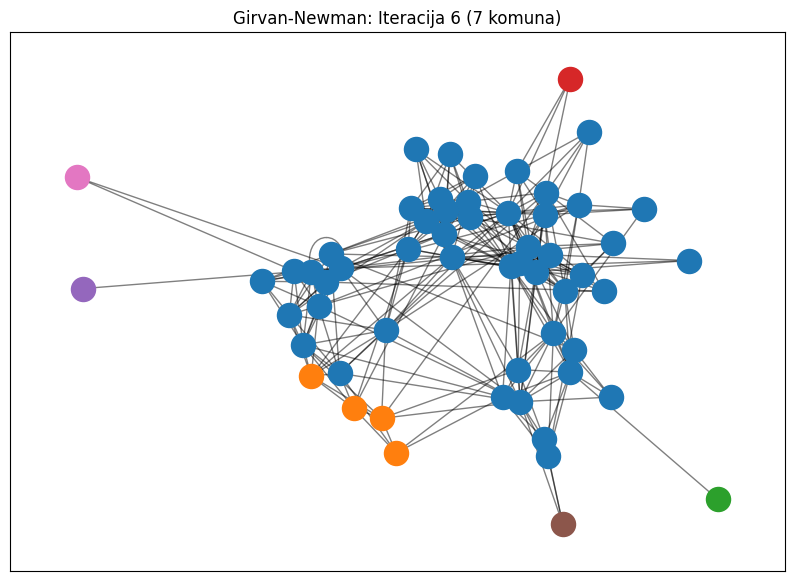

({'Stamenkovic M.', 'Lazarevic I.', 'Stevanovic G.', 'Milosevic E.', 'Bojovic K.', 'Milosevic I.', 'Markovic M.', 'Popadic D.', 'Nikolic V.', 'Korac M.', 'Jordovic J.', 'Ranin L.', 'Kekic D.', 'Malinic J.', 'Djukic S.', 'Trajkovic V.', 'Nikolic N.', 'Mijac V.', 'Vukovic D.', 'Cirkovic I.', 'Perovic V.', 'Nikolic A.', 'Jovanovic T.', 'Vukovic-Petrovic I.', 'Radovanovic-Spurnic A.', 'Cupic M.', 'Poluga J.', 'Stanojevic M.', 'Simonovic-Babic J.', 'Mitrovic N.', 'Miljanovic D.', 'Pravica V.', 'Dakic I.', 'Savic B.', 'Milosevic B.', 'Knezevic A.', 'Banko A.', 'Ranin J.', 'Gajic I.'}, {'Arsic-Arsenijevic V.', 'Dubljanin E.', 'Dzamic A.', 'Mitrovic S.'}, {'Vuckovic-Opavski N.'}, {'Gazibara T.', 'Sipetic-Grujicic S.', 'Kisic-Tepavcevic D.', 'Maksimovic N.', 'Markovic-Denic L.', 'Vujcic I.', 'Maksimovic J.', 'Maric G.', 'Marusic V.', 'Pekmezovic T.'}, {'Mijatovic S.'}, {'Jankovic M.'}, {'Arandjelovic I.'}, {'Jovanovic A.'})


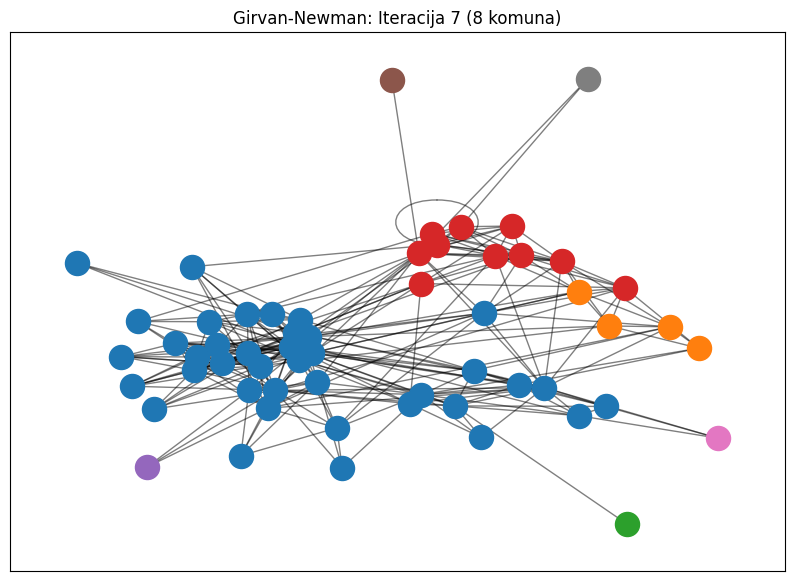

({'Stamenkovic M.', 'Lazarevic I.', 'Stevanovic G.', 'Milosevic E.', 'Bojovic K.', 'Milosevic I.', 'Markovic M.', 'Popadic D.', 'Nikolic V.', 'Korac M.', 'Jordovic J.', 'Ranin L.', 'Kekic D.', 'Malinic J.', 'Djukic S.', 'Trajkovic V.', 'Nikolic N.', 'Mijac V.', 'Vukovic D.', 'Cirkovic I.', 'Perovic V.', 'Nikolic A.', 'Jovanovic T.', 'Vukovic-Petrovic I.', 'Radovanovic-Spurnic A.', 'Cupic M.', 'Poluga J.', 'Stanojevic M.', 'Simonovic-Babic J.', 'Mitrovic N.', 'Pravica V.', 'Dakic I.', 'Savic B.', 'Milosevic B.', 'Knezevic A.', 'Banko A.', 'Ranin J.', 'Gajic I.'}, {'Arsic-Arsenijevic V.', 'Dubljanin E.', 'Dzamic A.', 'Mitrovic S.'}, {'Vuckovic-Opavski N.'}, {'Gazibara T.', 'Sipetic-Grujicic S.', 'Kisic-Tepavcevic D.', 'Maksimovic N.', 'Markovic-Denic L.', 'Vujcic I.', 'Maksimovic J.', 'Maric G.', 'Marusic V.', 'Pekmezovic T.'}, {'Mijatovic S.'}, {'Jankovic M.'}, {'Miljanovic D.'}, {'Arandjelovic I.'}, {'Jovanovic A.'})


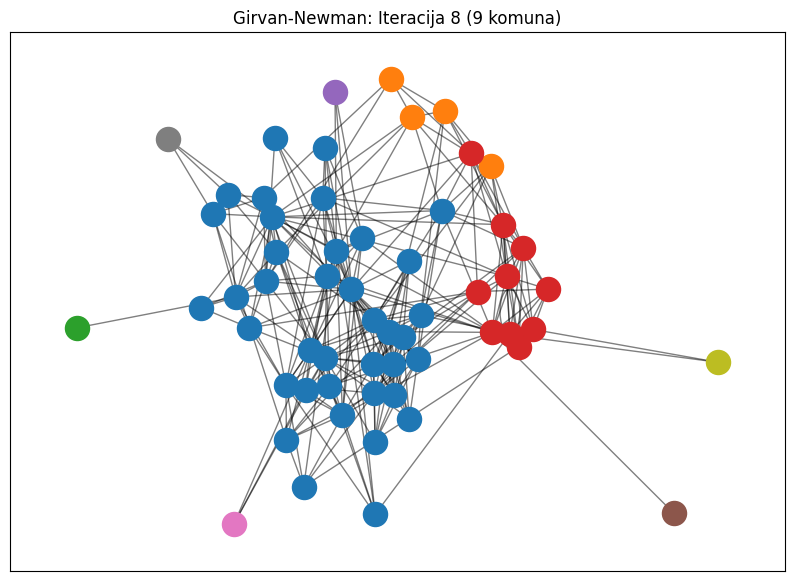

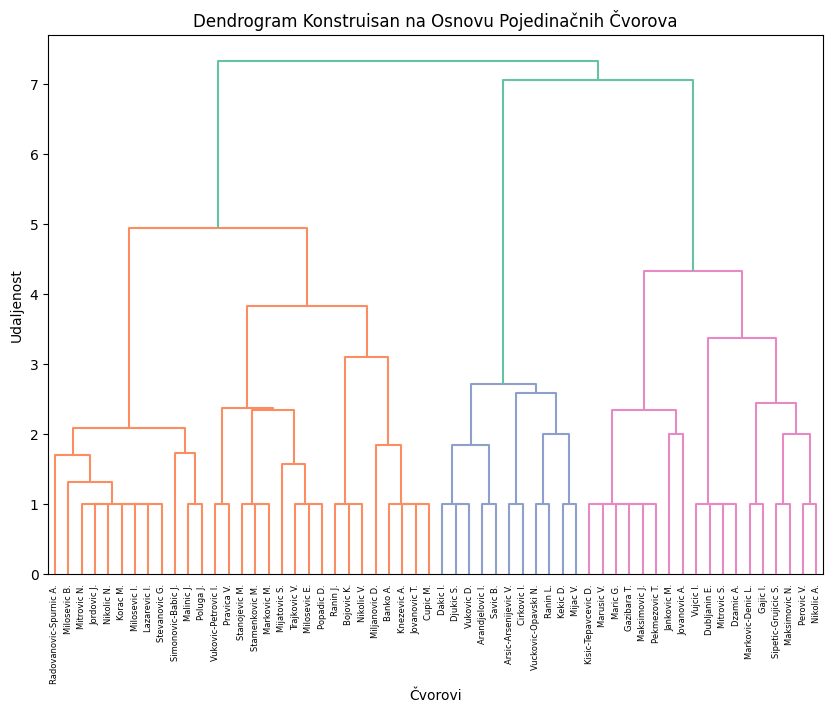

In [96]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman

def girvan_newman_visualize(G, num_iterations):
    # Primena Girvan-Newman metode
    comp = girvan_newman(G)
    
    # Iteracija kroz broj iteracija koje želimo
    for i in range(num_iterations):
        communities = next(comp)
        print(communities)
        communities = [list(c) for c in communities]
        
        # Vizualizacija
        pos = nx.spring_layout(G)
        plt.figure(figsize=(10, 7))
        
        # Generisanje boja
        colors = plt.cm.tab10.colors
        
        # Crtanje čvorova i veza
        for j, community in enumerate(communities):
            nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[colors[j % len(colors)]])
        nx.draw_networkx_edges(G, pos, alpha=0.5)
        
        # Naslov i prikaz
        plt.title(f'Girvan-Newman: Iteracija {i + 1} ({len(communities)} komuna)')
        plt.show()

# Podesite broj iteracija koje želite vizualizovati
num_iterations = 8
girvan_newman_visualize(G, num_iterations)
draw_dendogram(G)


### Kreiranje mreze casopisa

- Iteriramo kroz svaki red u combined_data.
- Ekstrahujemo autore i časopis za trenutni rad.
- Za svakog koautora, pronalazimo sve ostale radove tog koautora i dodajemo veze između časopisa u kojima su ti radovi objavljeni.
- Ako veza već postoji, povećavamo težinu veze; ako ne postoji, kreiramo novu vezu sa težinom 1.

In [98]:
# Kreiranje grafa
G_journals = nx.Graph()

# Dodavanje čvorova (časopisa)
journals = combined_data['Source title'].unique()
for journal in journals:
    G_journals.add_node(journal)

# Dodavanje veza (koautorstava između časopisa)
for index, row in combined_data.iterrows():
    authors = [author.strip() for author in row['Authors'].split(',')]
    journal = row['Source title']
    
    # Pronaći sve ostale radove istih autora i dodati veze između časopisa
    for coauthor in authors:
        coauthor_papers = combined_data[combined_data['Authors'].str.contains(coauthor)]
        coauthor_journals = coauthor_papers['Source title'].unique()
        
        for coauthor_journal in coauthor_journals:
            if journal != coauthor_journal:
                if G_journals.has_edge(journal, coauthor_journal):
                    G_journals[journal][coauthor_journal]['weight'] += 1
                else:
                    G_journals.add_edge(journal, coauthor_journal, weight=1)

# Proverite graf
print(G_journals.nodes(data=True))
print(G_journals.edges(data=True))


C:\Users\ira\AppData\Local\Temp\ipykernel_23704\1534667737.py:16: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  coauthor_papers = combined_data[combined_data['Authors'].str.contains(coauthor)]


[('Antimicrobial Resistance and Infection Control', {}), ('Journal of B.U.ON.', {}), ('Injury', {}), ('Acta Microbiologica et Immunologica Hungarica', {}), ('PLoS ONE', {}), ('Journal of Infection in Developing Countries', {}), ('Eurosurveillance', {}), ('Vojnosanitetski Pregled', {}), ('Journal of Lower Genital Tract Disease', {}), ('Arhiv za Higijenu Rada i Toksikologiju', {}), ('Medicinski Casopis', {}), ('Zdravstveno Varstvo', {}), ('Journal of Hospital Infection', {}), ('Turkish Journal of Medical Sciences', {}), ('Medical Principles and Practice', {}), ('Surgical Infections', {}), ('Jornal Brasileiro de Pneumologia', {}), ('Patient Preference and Adherence', {}), ('International Journal of Infectious Diseases', {}), ('Digestive and Liver Disease', {}), ('Journal of the American Geriatrics Society', {}), ('American Journal of Infection Control', {}), ('Geriatrics and Gerontology International', {}), ('Psychogeriatrics', {}), ('International Journal of Injury Control and Safety Pro

In [90]:
nx.write_gml(G_journals, "network_journals.gml")

In [99]:
# Broj čvorova
num_nodes = G_journals.number_of_nodes()

# Broj grana
num_edges = G_journals.number_of_edges()

# Prosečan stepen
average_degree = sum(dict(G_journals.degree()).values()) / num_nodes

# Gustina
density = nx.density(G_journals) # Gustina mreže je mera koja pokazuje koliko je mreža povezana, odnosno koliki je odnos stvarnih veza (grana) u mreži u odnosu na maksimalni broj mogućih veza

# Prečnik mreže (računa se samo za povezane komponente)
if nx.is_connected(G_journals):
    diameter = nx.diameter(G_journals)
    average_path_length = nx.average_shortest_path_length(G_journals)
else:
    diameter = "N/A (mreža nije povezana)" # Mreža je povezana kada postoji put između svakog para čvorova
    average_path_length = "N/A (mreža nije povezana)"

# Prikazivanje osnovnih karakteristika mreže
print(f"Broj čvorova: {num_nodes}")
print(f"Broj grana: {num_edges}")
print(f"Gustina mreže: {density:.4f}")
print(f"Prosečan stepen: {average_degree:.2f}")
print(f"Prečnik mreže: {diameter}")
print(f"Prosečna dužina puta: {average_path_length}")

Broj čvorova: 539
Broj grana: 25713
Gustina mreže: 0.1773
Prosečan stepen: 95.41
Prečnik mreže: N/A (mreža nije povezana)
Prosečna dužina puta: N/A (mreža nije povezana)


In [100]:
# Pronalaženje svih povezanih komponenti
connected_components = list(nx.connected_components(G_journals))
num_components = len(connected_components)

# Izračunavanje veličina povezanih komponenti
component_sizes = [len(component) for component in connected_components]
max_component_size = max(component_sizes)

# Provera postojanja gigantske komponente (gigantska komponenta sadrži više od 50% čvorova)
num_nodes = G_journals.number_of_nodes()
gigantic_component_threshold = 0.5 * num_nodes
has_gigantic_component = max_component_size > gigantic_component_threshold

# Centralnost mreže
degree_centralization = nx.degree_centrality(G_journals)
betweenness_centralization = nx.betweenness_centrality(G_journals)
closeness_centralization = nx.closeness_centrality(G_journals)

# Prosečne vrednosti centralnosti
avg_degree_centralization = sum(degree_centralization.values()) / num_nodes
avg_betweenness_centralization = sum(betweenness_centralization.values()) / num_nodes
avg_closeness_centralization = sum(closeness_centralization.values()) / num_nodes

# Prikaz rezultata
print(f"Broj povezanih komponenti: {num_components}")
print(f"Veličine povezanih komponenti: {component_sizes}")
print(f"Najveća povezana komponenta: {max_component_size}")
print(f"Postoji li gigantska komponenta: {'Da' if has_gigantic_component else 'Ne'}")
print(f"Prosečni stepen centralnosti: {avg_degree_centralization:.4f}")
print(f"Prosečna betweenness centralnost: {avg_betweenness_centralization:.4f}")
print(f"Prosečna closeness centralnost: {avg_closeness_centralization:.4f}")

Broj povezanih komponenti: 2
Veličine povezanih komponenti: [538, 1]
Najveća povezana komponenta: 538
Postoji li gigantska komponenta: Da
Prosečni stepen centralnosti: 0.1773
Prosečna betweenness centralnost: 0.0016
Prosečna closeness centralnost: 0.5453


Prosečni koeficijent klasterizacije: 0.7360984666116343
Globalni koeficijent klasterizacije: 0.5933891936841904
Lokalni koeficijent klasterizacije - Raspodela: 0.7360984666116345, 0.1942705238575129


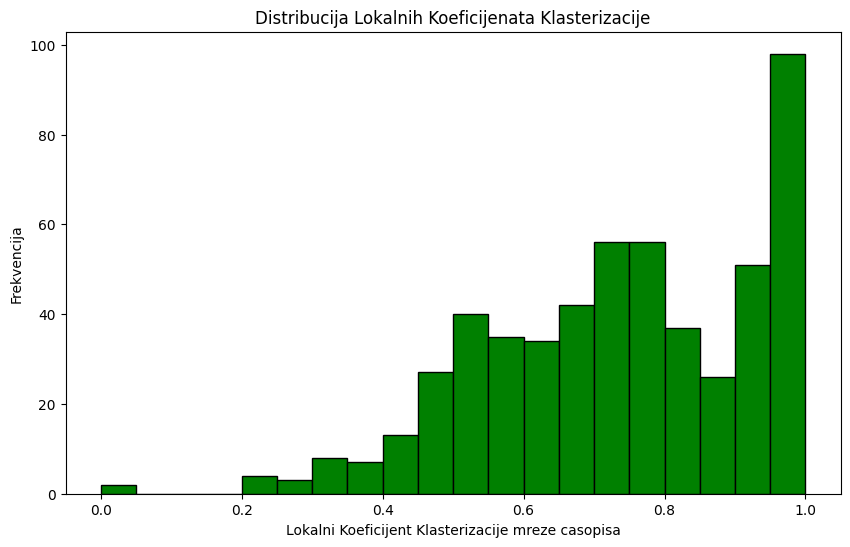

In [102]:
import numpy as np

# Izračunavanje prosečnog i globalnog koeficijenta klasterizacije
average_clustering = nx.average_clustering(G_journals)
global_clustering = nx.transitivity(G_journals)

# Izračunavanje lokalnog koeficijenta klasterizacije
local_clustering = nx.clustering(G_journals)
local_clustering_values = list(local_clustering.values())

print(f"Prosečni koeficijent klasterizacije: {average_clustering}")
print(f"Globalni koeficijent klasterizacije: {global_clustering}")
print(f"Lokalni koeficijent klasterizacije - Raspodela: {np.mean(local_clustering_values)}, {np.std(local_clustering_values)}")

plt.figure(figsize=(10, 6))
plt.hist(local_clustering_values, bins=20, color='green', edgecolor='black')
plt.title('Distribucija Lokalnih Koeficijenata Klasterizacije')
plt.xlabel('Lokalni Koeficijent Klasterizacije mreze casopisa')
plt.ylabel('Frekvencija')
plt.show()

Koeficijent asortativnosti po stepenu čvora: -0.037112668909883434


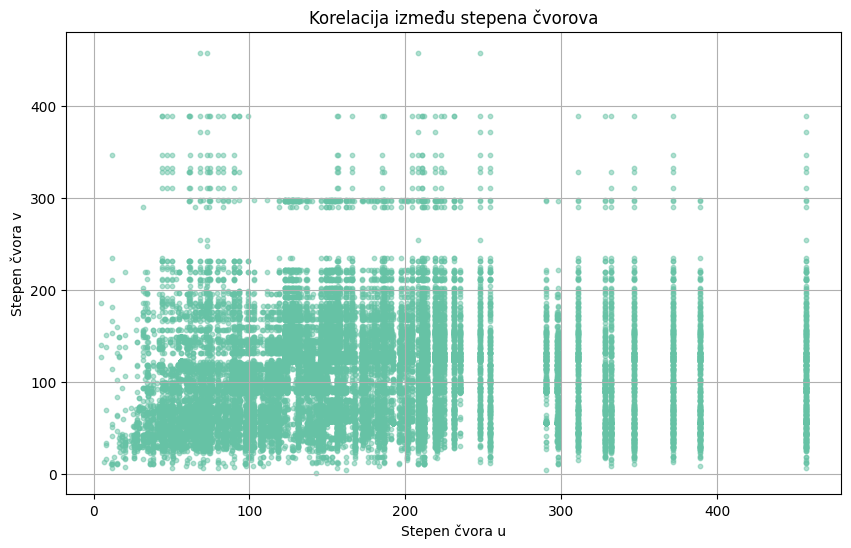

In [104]:
# Izračunavanje koeficijenta asortativnosti po stepenu čvora
assortativity_coefficient = nx.degree_assortativity_coefficient(G_journals)

# Prikaz rezultata
print(f"Koeficijent asortativnosti po stepenu čvora: {assortativity_coefficient}")

import matplotlib.pyplot as plt

# Vizualizaciju
degree_dict = dict(G_journals.degree())
degree_pairs = [(degree_dict[u], degree_dict[v]) for u, v in G_journals.edges()]
degree_u, degree_v = zip(*degree_pairs)

# Scatter plot za korelaciju između stepena čvorova
plt.figure(figsize=(10, 6))
plt.scatter(degree_u, degree_v, alpha=0.5, s=10)
plt.xlabel('Stepen čvora u')
plt.ylabel('Stepen čvora v')
plt.title('Korelacija između stepena čvorova')
plt.grid(True)
plt.show()

Counter({56: 30, 89: 11, 58: 9, 45: 9, 44: 8, 50: 8, 90: 7, 70: 7, 123: 7, 125: 7, 131: 7, 38: 7, 60: 7, 93: 6, 32: 6, 127: 6, 94: 6, 64: 6, 114: 6, 102: 6, 100: 6, 61: 5, 72: 5, 34: 5, 128: 5, 59: 5, 35: 5, 91: 5, 95: 5, 46: 5, 29: 5, 43: 5, 47: 4, 12: 4, 80: 4, 74: 4, 79: 4, 55: 4, 65: 4, 119: 4, 149: 4, 132: 4, 124: 4, 37: 4, 51: 4, 42: 4, 69: 4, 49: 4, 28: 4, 117: 4, 118: 4, 57: 4, 98: 4, 97: 4, 73: 3, 68: 3, 211: 3, 186: 3, 212: 3, 99: 3, 151: 3, 103: 3, 146: 3, 153: 3, 155: 3, 137: 3, 129: 3, 152: 3, 140: 3, 76: 3, 19: 3, 67: 3, 112: 3, 54: 3, 92: 3, 41: 3, 52: 3, 26: 3, 36: 3, 219: 2, 62: 2, 83: 2, 156: 2, 75: 2, 231: 2, 20: 2, 158: 2, 53: 2, 111: 2, 126: 2, 162: 2, 220: 2, 130: 2, 136: 2, 172: 2, 182: 2, 154: 2, 173: 2, 133: 2, 176: 2, 138: 2, 168: 2, 13: 2, 85: 2, 115: 2, 71: 2, 107: 2, 101: 2, 15: 2, 145: 2, 120: 2, 143: 2, 88: 2, 109: 2, 31: 2, 27: 2, 25: 2, 40: 2, 30: 2, 11: 2, 248: 1, 208: 1, 457: 1, 254: 1, 372: 1, 157: 1, 204: 1, 166: 1, 185: 1, 223: 1, 347: 1, 332: 1, 3

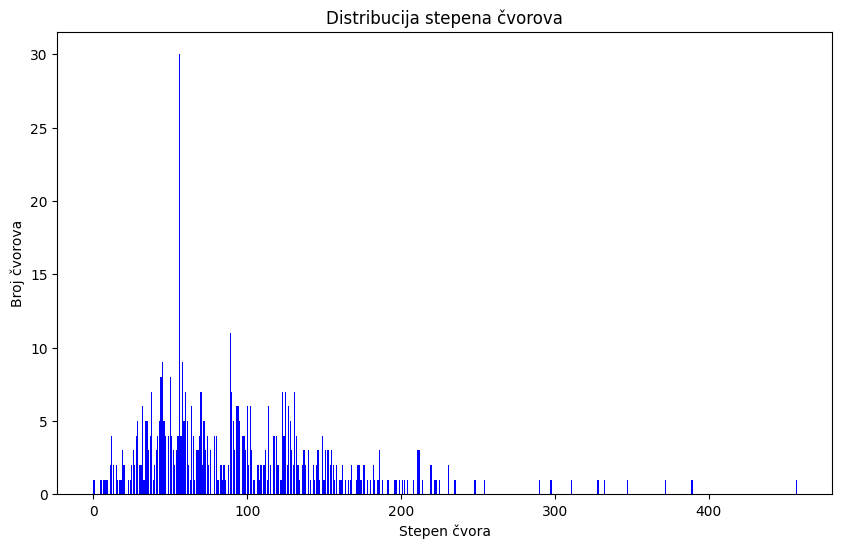

In [105]:
# Izračunavanje stepena čvorova
degree_sequence = [d for n, d in G_journals.degree()]

# Prikaz distribucije stepena čvorova
degree_count = Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

print(degree_count)

plt.figure(figsize=(10, 6))
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Distribucija stepena čvorova")
plt.xlabel("Stepen čvora")
plt.ylabel("Broj čvorova")
plt.show()

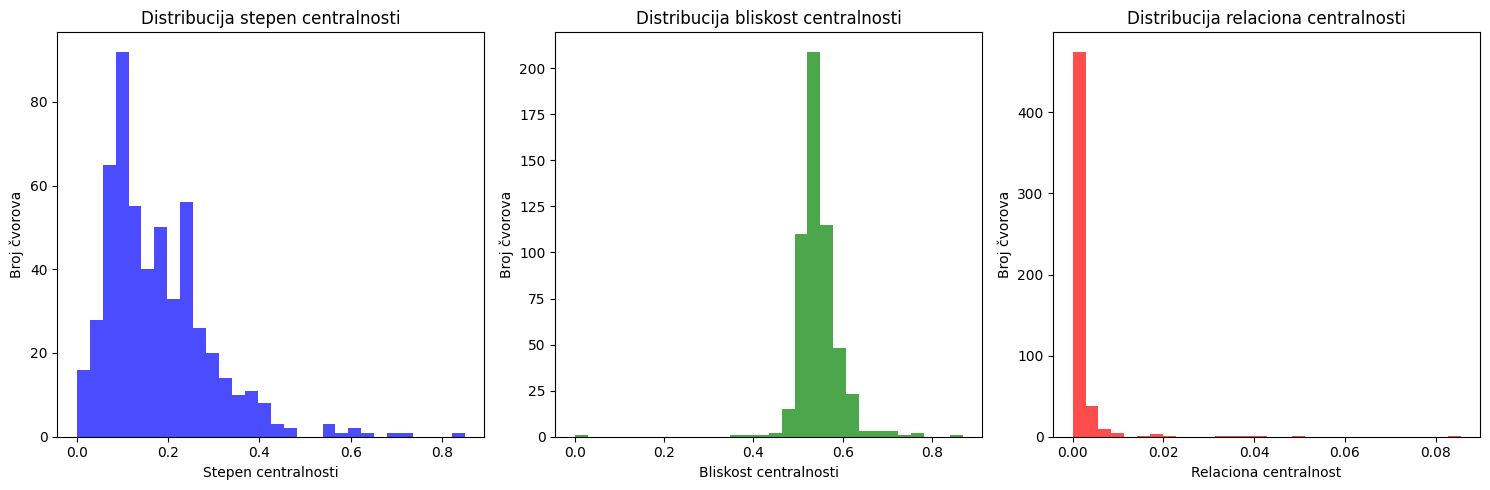

Author  Degree Centrality  \
4                              PLoS ONE           0.849442   
42  Srpski arhiv za celokupno lekarstvo           0.723048   
7               Vojnosanitetski Pregled           0.691450   
25  Srpski Arhiv za Celokupno Lekarstvo           0.644981   
26      Archives of Biological Sciences           0.617100   

    Closeness Centrality  Betweenness Centrality  
4               0.868723                0.085477  
42              0.781344                0.050301  
7               0.763535                0.034342  
25              0.737279                0.031485  
26              0.721402                0.041526

In [111]:
def calculate_centrality(G):
    # Izračunavanje stepen centralnosti
    degree_centrality = nx.degree_centrality(G)

    # Izračunavanje bliskost centralnosti
    closeness_centrality = nx.closeness_centrality(G)

    # Izračunavanje relaciona centralnosti
    betweenness_centrality = nx.betweenness_centrality(G)

    # Kreiranje DataFrame-a za prikaz rezultata
    centrality_df = pd.DataFrame({
        'Author': list(G.nodes()),
        'Degree Centrality': [degree_centrality[node] for node in G.nodes()],
        'Closeness Centrality': [closeness_centrality[node] for node in G.nodes()],
        'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes()]
    })

    # Vizualizacija centralnosti
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.hist(list(degree_centrality.values()), bins=30, color='b', alpha=0.7)
    plt.title('Distribucija stepen centralnosti')
    plt.xlabel('Stepen centralnosti')
    plt.ylabel('Broj čvorova')

    plt.subplot(1, 3, 2)
    plt.hist(list(closeness_centrality.values()), bins=30, color='g', alpha=0.7)
    plt.title('Distribucija bliskost centralnosti')
    plt.xlabel('Bliskost centralnosti')
    plt.ylabel('Broj čvorova')

    plt.subplot(1, 3, 3)
    plt.hist(list(betweenness_centrality.values()), bins=30, color='r', alpha=0.7)
    plt.title('Distribucija relaciona centralnosti')
    plt.xlabel('Relaciona centralnost')
    plt.ylabel('Broj čvorova')

    plt.tight_layout()
    plt.show()
    # centrality_df.sort_values(by='Degree Centrality', ascending=False).head(5)
    # centrality_df.sort_values(by='Closeness Centrality', ascending=False).head(5)
    # centrality_df.sort_values(by='Betweenness Centrality', ascending=False).head(5)
    return centrality_df

journals_centrality_df = calculate_centrality(G_journals)


# journals_centrality_df.sort_values(by='Degree Centrality', ascending=False).head(5)
journals_centrality_df.sort_values(by='Closeness Centrality', ascending=False).head(5)
# journals_centrality_df.sort_values(by='Betweenness Centrality', ascending=False).head(5)


                                   Author  Eigenvector Centrality
4                                PLoS ONE                0.119871
7                 Vojnosanitetski Pregled                0.111872
42    Srpski arhiv za celokupno lekarstvo                0.108510
25    Srpski Arhiv za Celokupno Lekarstvo                0.103833
29            Acta chirurgica Iugoslavica                0.099680
128       Journal of Medical Biochemistry                0.099349
151            Journal of Neuroimmunology                0.098100
88   Journal of the Neurological Sciences                0.097511
1                      Journal of B.U.ON.                0.094109
39               Croatian Medical Journal                0.092550


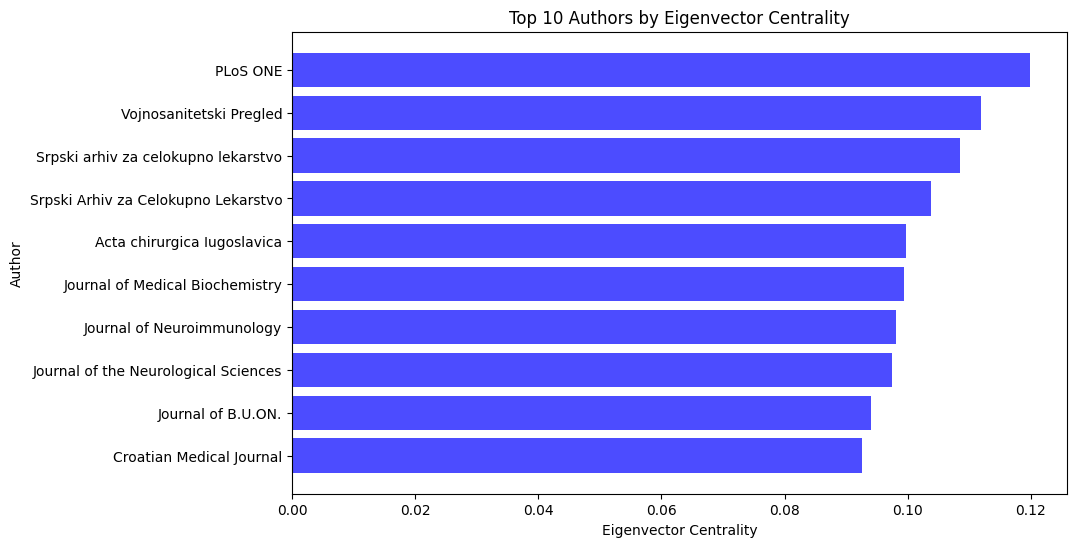

Author  Eigenvector Centrality
4                                PLoS ONE                0.119871
7                 Vojnosanitetski Pregled                0.111872
42    Srpski arhiv za celokupno lekarstvo                0.108510
25    Srpski Arhiv za Celokupno Lekarstvo                0.103833
29            Acta chirurgica Iugoslavica                0.099680
128       Journal of Medical Biochemistry                0.099349
151            Journal of Neuroimmunology                0.098100
88   Journal of the Neurological Sciences                0.097511
1                      Journal of B.U.ON.                0.094109
39               Croatian Medical Journal                0.092550

In [113]:
def calculate_eigenvector_centrality(G):
    # Izračunavanje centralnosti po sopstvenom vektoru
    eigenvector_centrality = nx.eigenvector_centrality(G)

    # Kreiranje DataFrame-a za prikaz rezultata
    eigenvector_centrality_df = pd.DataFrame({
        'Author': list(G.nodes()),
        'Eigenvector Centrality': [eigenvector_centrality[node] for node in G.nodes()]
    })

    # Sortiranje DataFrame-a po centralnosti po sopstvenom vektoru
    eigenvector_centrality_df = eigenvector_centrality_df.sort_values(by='Eigenvector Centrality', ascending=False)

    # Prikazivanje prvih nekoliko rezultata
    print(eigenvector_centrality_df.head(10))

    # Vizualizacija centralnosti po sopstvenom vektoru
    plt.figure(figsize=(10, 6))
    plt.barh(eigenvector_centrality_df['Author'].head(10), eigenvector_centrality_df['Eigenvector Centrality'].head(10), color='b', alpha=0.7)
    plt.xlabel('Eigenvector Centrality')
    plt.ylabel('Author')
    plt.title('Top 10 Authors by Eigenvector Centrality')
    plt.gca().invert_yaxis()
    plt.show()

    return eigenvector_centrality_df

journals_eigenvector_centrality_df = calculate_eigenvector_centrality(G_journals)
journals_eigenvector_centrality_df.head(10)